<a href="https://colab.research.google.com/github/LinQiu0/Math-Clinic-UCD/blob/main/RealvsModeled_Ultimate_AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Comparison of Real and Modeled CYGNSS Observations**

Required Files:

1.   validation_set.nc
2.   validation_set_swh.nc




# Contributions

**Lin**
- Coding of visualization and statistical analysis
- Definition of functions
- Ensure coding is free from redundancy and repitition
- Take notes on recommendations made and record the project progress and goals
- Analyze the new dataset to compute and scatterplot the peak signal-to-noise ratio (PSNR)
- Examine differences between different model outputs


**Simale**
- Primary manager and communicator
- Determine the statistical analysis or methods to be used
- Analyze the mathematical equations/functions incorporated
- Determine visualization methods to be used and take part in their coding
- Compose and polish the notebook

**Zheyuan**
- Primary python expert
- Search and install packages to create programming environment
- Code manager for visualization and statistical analysis
- Definition of functions
- Application of bootstrap in statistical analysis
- Review final code for the entire notebook











# Abstract

In this project, we examined the differences between real and modeled DDM observations for two trained models. We performed statistical analysis, in particular, error computations such as Mean absolute error (MAE), Root mean square error (RMSE) and Normalized RMSE to investigate how close or far the modeled DDM observations for the two models are from their corresponding real DDM observations. This was done by binning the models' datasets on wind speed statistics to further examine if extreme wind speeds affect the accuracy of modeled observations. Furthermore, the performance of these models was compared using Peak-signal-to-noise ratio (PSNR).

# Introduction
* What is the motive and history (before Math Clinic) of the project?


Tropical cyclones (TC) are essential in predicting hurricanes. Although the tracks of TC's have been accurately predicted in recent years, the forecasting of their intensity has not. However, in 2016, NASA launched the Cyclone Global Navigation Satellite System (CYGNSS) which consists of 8 satellites, in hopes that it will mitigate the drawbacks of previous satellites in capturing the ocean surface wind speed which is in the form of delay doppler maps (DDM) of TCs, especially inner core TCs. When unideal conditions such as high precipitation arose, those satellites had difficulty penetrating and capturing the surface wind speeds on ocean surfaces. Fortunately, the CYGNSS satellite through data assimilation has done substantial progress by providing accurate reports of ocean surface wind speed (DDM) observations regardless of conditions. More information about CYGNSS history and applications can be found here. [CYGNSS Handbook](https://www.fulcrum.org/epubs/7p88ck25t?locale=en)

Our project sponsor Spire Global has developed a machine learning operator that takes the vector winds around real observations as input features and outputs the estimates for the real observations which will be referred to as modeled observations henceforth. Accurately estimating the real observations will create initial conditions for improved hurricane forecasting. However, concern has arose that the machine learning operator has limitations when it pertains to its performance in accurately estimating the observations associated with minimum and maximum wind speeds. In collaboration with Spire Global, our Math Clinic project team, as noted above, performed error computation to examine the differences between the real and modeled CYGNSS observations of two trained models. One of the models (as it will be discussed below) has an additional feature that affects the computational run time of the model. This project checks if the inclusion of this feature in Spire's machine learning operator improves the performance significantly.

* What (ideally) will be its impact on the sponsor or other stakeholders?

Ideally, we hope that our project helps the sponsor answer their question of how well their machine learning operator performs for minimum and maximum wind speeds. It is our hope that we form a conclusion that is well-suppoprted by our error analysis, and that Spire can utilize that to test their assumption and consider making some changes to their neural network architecture to improve the machine learning model's performance. In addition to that, we hope that our project can give the sponsors an explanation on whether the addition of the feature mentioned above is necessary.

# Methods

##Data

* Describe the data or computational space, their amount (in bytes, number of files etc.), type (categorical, numerical etc.) and physical units.

There are two dataset files in NetCDF format that were used in this project, both provided by the sponsor. Their sizes are 62.3 MB and 49.6 MB and for both datasets, the number and types of variables (i.e. numerical) were the same. As mentioned in the introduction section, the files each consist of 17 x 11 array containing CYGNSS (real) DDM observations in watts where length-17 is the delay in the reflected signal and length-11 is the doppler (frequency) shift of that signal. The files also consist of the 17 x 11 array containing the corresponding modeled DDM observations from Spire's machine learning operator, 4 × 4 grid of vector winds with components in the north/south and east/west directions both 125km x 125km around the observation location (in m/s), the longitude and latitude of the observations, and lastly, the instrument number of the CYGNSS satellite. One difference between the datasets were the number of observations; model one's dataset has 39696 pairs of real and modeled observations and model two's dataset has 31776 pairs. It is also important to mention that the CYGNSS (real) DDM observations are different in both the datasets. Another difference is that the model/dataset with 31776 observations was trained on one additional feature, the wave/swell height on a coarse grid around the observation.

##Mean Absolute Error and Root Mean Square Error

Statistically analyzing the differences between the real and modeled observations of each model is one of the goals of our project. As mentioned above, we can utilize metrics such as Mean absolute error and Root mean square error, which will be referred to as $D$ and $R$ respectively for the entirety of this project. These metrics quantify how the modeled DDM observations vary from the CYGNSS observations.
Since there was an assumption that the machine learning operator fails to perform well for extreme wind speeds, different ranges of windspeeds were closely examined. To achieve this, binning the dataset on windspeed statistics and computing the $D$ and $R$ for each bin appeared to be a feasible method. Click on these sources to find more information on [Mean Absolute Error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error), [Root Mean Square Error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) and [their similarities and differences](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d).

It is important to note that the analysis below was done for both the dataset files.

The wind speed statistics that was initally computed is the mean wind speed for each pair of observation. Since the dataset files consists of two 4 x 4 vector wind grids, denoted by $U$ and $V$, a 4 x 4 grid of wind speed was calculated by:

$$W_{j,k}^i = \sqrt{(U_{j,k}^i)^2 + (V_{j,k}^i)^2}$$

where ${W}^i$ is a 4 x 4 grid of wind speed for each observation, ${U}^i$ and ${V}^i$ are the east/west and north/south wind vectors respectively for the observation, $j$ and $k$ are the row and column respectively in those 4 x 4 vector grids.




Following that, the 16 values in ${W}^i$ were averaged, resulting in a mean wind speed in m/s for each observation.

Then, the dataset was binned based on the values of the mean wind speeds. After determining the minimum and maximum mean wind speeds in the entire dataset and choosing to bin the dataset into 8 bins, roughly equal intervals were formed. Then, all the real and modeled observations that had mean wind speed values that fell between the interval's edges were placed in that interval. This created 8 subsets or bins of the original dataset.  

The Mean Absolute Error (D) and RMSE (R) for each bin was then computed by:

$${D = {\frac{1}{187M}}{\sum_{m=1}^M}{\sum_{j=1}^{17}}{\sum_{k=1}^{11}}|{Y_{j,k}^m}-\widehat{Y_{j,k}^m}|}$$

$${R = \sqrt{{\frac{1}{187M}}{\sum_{m=1}^M}{\sum_{j=1}^{17}}{\sum_{k=1}^{11}}{({Y_{j,k}^m}-\widehat{Y_{j,k}^m})}^2}}$$

where $Y$ is the real observation, $\hat{Y}$ is the corresponding modeled observation, $M$ is the number of observations in a particular bin, 187 is 17 x 11,  $j$ and $k$ are the rows and columns in the 17 x 11 DDM array.

These formulae output the $D$ and $R$ values in watts for each of the eight bins for both the datasets.

Source for the unit of $D$ and $R$- Personal communication with sponsor

Following that, the original datasets were discretized into 16 bins instead of 8. This was done to see if having more bins will help in finding the wind speed ranges that fail to accurately estimate the real CYGNSS observations. The same methodology was applied to calculate the $D$ and $R$ with the only differences being the number of bins and the number of $D$'s and $R$'s ($16$ $D$ and $16$ $R$ values for each dataset).

One possible drawback of only using the mean wind speed of the ${W}^i$ grid is that some observations that have very high wind speeds in the grid may be overlooked when the grid values are averaged. This would also be the case for observations that have very low wind speeds in the grid. Hence, repeating the above analysis, but using the maximum and minimum wind speed in the ${W}^i$ rather than the mean wind speed can help address this drawback. The binning process as well as $D$ and $R$ computation and number of values remained the same i.e. for all the wind speed statistics, both datasets were discretized into 8 bins followed by 16 bins.

Source- Personal communication with sponsor

Following that, to estimate variability of our results, we performed bootstrap with replacement on our data. More about bootstrapping can be found here: [Bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)#Types_of_bootstrap_scheme)

##Normalized Error

Another statistical metric that was used in this project is Normalized Root Mean Square Error or [NRMSE](https://towardsdatascience.com/6-common-metrics-for-your-next-regression-project-4667cbc534a7#d47a). We followed the same procedure as the R calculation. In fact, we used the RMSE or $R$ values of each bin (as explained in the previous section) and normalized them by the standard deviation of the real observations found in their respective bin.

The NRMSE (NR) was computed by:

$${NR = {\frac{R_n}{\sigma_n(Y_{obs})}}}$$

where $R_n$ is the $R$ value of the $n^{th}$ bin and $\sigma_n(Y_{obs})$ is the standard deviation of the real observations in the $n^{th}$ bin.

##Peak Signal-to-Noise Ratio



Another metric that was used to compare the models' performance is peak signal-to-noise ratio (PSNR) in dB. Simply put, it is the ratio between the maximum possible power of an image and the corrupting noise that distorts the quality. These sources give detailed information about PSNR and its application. [PSNR](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio), [Reconstruction of high resolution DDM based on a low-resolution DDM](https://www.mdpi.com/2072-4292/12/6/916).

The formula for it is as follows:

$${PSNR = 10 × \log_{10}(\frac{P^2}{MSE}) }$$

where P is the maximum possible peak value based on the image datatype.

$${MSE = \frac{1}{N}{∥}Y - \hat{Y}{∥}_F^2}$$

where $Y$ is the CYGNSS/real observation, $\hat{Y}$ is the corresponding modeled observation both with $N$ pixels, and $∥ ⋅ ∥_F^2$ is the Frobenius norm.

As it can be seen from the $PSNR$ formula, increasing the ratio ${\frac{P^2}{MSE}}$ by a factor of $x$ results in an increase of PSNR by $10\log_{10}x$.

Although the PSNR equation found in the equation 5 in this [link](https://www.mdpi.com/2072-4292/12/6/916) has the reference image $I$ and the reconstructed image $\hat{I}$, we have slightly altered those to our real $Y$ and modeled $\hat{Y}$observations respectively. This was done so that the concept of $PSNR$ can be applied to evalaute the performance of our two trained models.

$PSNR$ values were also computed for each of the 16 bins instead of 8 to have more PSNR values to compare. In addition, the computation of the error metric $R$ as discussed above is equivalent to the Frobenius norm. Hence, the square of $R$ in a bin provides the $MSE$ needed for the $PSNR$ computation of that bin.

For this project, PSNR in dB for each bin was computed by:

$${PSNR = 10 × log_{10}(\frac{P^2}{R^2}) }$$

where $P$ is the maximum possible peak value or the largest number from all the 17 x 11 real DDM observations found in a bin and $R$ is the root mean square error of the same bin.

##Visualization methods

As it will be seen below, we have plotted samples of real and modeled DDM observations heat maps for both models. The units for the delay and doppler of the maps were obtained from this [paper](https://olucdenver-my.sharepoint.com/personal/aime_fournier_ucdenver_edu/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Faime%5Ffournier%5Fucdenver%5Fedu%2FDocuments%2Fmath%5Fclinic%2F2023sp%2FSpire%2FThe%5FSGR%2DReSI%5Fand%5Fits%5Fapplication%5Ffor%5FGNSS%5Freflectometry%5Fon%5Fthe%5FNASA%5FEV%2D2%5FCYGNSS%5Fmission%2Epdf&parent=%2Fpersonal%2Faime%5Ffournier%5Fucdenver%5Fedu%2FDocuments%2Fmath%5Fclinic%2F2023sp%2FSpire&ct=1683948227218&or=OWA%2DNT&cid=9cd3273e%2D0150%2Dfe24%2D44d7%2D49be112c0cd1&ga=1), which explains that the doppler is in kHz while the delay is in CA Code chip. ChatGPT further explained the latter as, "Therefore, the time unit for measuring the duration of a CA code chip is seconds, and the duration of a single CA code chip is 1 μs or 0.000001 seconds" (Generated on 5/12/2023).

Additionally, we have attempted to visualize the vector wind found around an observation. We have also plotted the locations of the observations on a world map.

After discretizing our datasets and performing our error analysis, we proceeded to show scatterplots of mean DDMS vs mean wind speed, mean DDMs vs maximum wind speed and lastly, mean DDMs vs minimum wind speed for both models side by side to visually asses the relationship between the mean DDMs and wind speed statistics. Histograms of the wind speed statistics were plotted as well.

To visually assess our error metrics $D$, $R$, $NR$ and $PSNR$, we made a scatterplot of their values against wind speed. It was initially challenging given that there are hundreds, if not thousands of wind speeds in a certain bin, but there is only one $D$, $R$, $NR$ and $PSNR$ for that bin. In other words, their dimensions aren't equal which is unideal for scatterplots. However, we proceeded to represent a bin with one wind speed statistic i.e. the median wind speed in that specific bin. This addressed the unequal dimension issue. For the question of why median wind speed of each bin was chosen, we believe that it will be the best representative of wind speed in a specific bin. More about using median as a generalization method can be found here: [Median's robustness](https://en.wikipedia.org/wiki/Median)

Following that, as mentioned above, bootstrapping with replacement was performed on the datasets to estimate the variablity. This yielded ranges of values which were used to calculate their standard deviation to add standard error bars on the scatter plots of the error metrics.

#Notebook Code

##Import libraries

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 83.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 76.4 MB/s eta 0:00:00


In [ ]:
!pip install netCDF4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.9 MB/s eta 0:00:00


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import math
import statistics
import netCDF4 as nc
import geopandas as gp
from matplotlib.patches import Rectangle
from shapely.geometry import Point
import itertools
import random
import geopandas.datasets as gpd_data


##Google drive setup

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cwd = os.getcwd()       # Assumes no cd commands were executed
pathTeam = cwd + '/drive/My Drive/'
pathProfessor = 'Colab Notebooks/Math Clinic/2023sp/Spire/Real v modeled/Data/'
if os.path.exists(pathTeam + pathProfessor):
 pathTeam += pathProfessor
pathTeam += '' # Should be a shortcut to shared folder owned by Team (not instructor)
os.listdir(pathTeam)    # Just a handy check that we see the expected files


['validation_set.nc', 'validation_set_swh.nc']

##Definition of Functions

In [ ]:
                # FUNCTIONS FOR EXPLORATORY VISUALIZATION

''' The following 2 functions plot the heat maps of 8 real obs and their
corresponding modeled observations for both models '''
def create_heatmaps(data_name, indices, title, filename):
    fig, axs = plt.subplots(2, 4, figsize=(12, 6))

    dm3 = 187

    for i in range(2):
        for j in range(4):
            index = 4 * i + j
            sample_ddm = data_name.Y_model[indices[index], 0:dm1, 0:dm2] if title.startswith("The corresponding") else data_name.Y_obs[indices[index], 0:dm1, 0:dm2]
            im = axs[i, j].imshow(sample_ddm, cmap='jet')
            if title.startswith("The corresponding"):
              #R_heatmaps = np.sqrt(1/dm3 * ((sample_ddm - data_name.Y_obs[indices[index], 0:dm1, 0:dm2])**2).sum())
              #rounded_R = '{:.2e}'.format(R_heatmaps.item())

              D_heatmaps = 1/dm3 * abs(sample_ddm - data_name.Y_obs[indices[index], 0:dm1, 0:dm2]).sum()
              rounded_D = '{:.2e}'.format(D_heatmaps.item())
              axs[i, j].set_title(f'D = {rounded_D} watts', fontsize=7)
              #axs[i, j].set_title(f'R = {rounded_R}', fontsize=10)

            axs[i, j].set_xlabel('Doppler in kHz')
            axs[i, j].set_ylabel('Delay in seconds')
            fig.colorbar(im, ax=axs[i, j], label= 'DDM values in watts', pad = 0.15)

    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(wspace=0.55, hspace=0.4)
    fig.savefig(filename)


def ddm_heatmaps(data_name, model_name):
    # a list of random indices of the Y obs for the heat maps

    random_indices = random.sample(range(31777), 8)

    #call the functions that plot the heat maps of the models
    create_heatmaps(data_name, random_indices, f"{model_name} real DDM observations", 'ddm_obs_heatmap.png')
    create_heatmaps(data_name, random_indices, "The corresponding modeled DDM observations", 'ddm_modeled_heatmap.png')

# A function to plot one sample real DDM obs and its corresponding modeled obs
# The code found in this function was provided by the sponsor
def create_plots(dataset, model_num):
    shape = np.shape(dataset.Lat)
    nobs = shape[0]
    shapeddm = np.shape(dataset.Y_obs)
    dm1 = shapeddm[1]
    dm2 = shapeddm[2]
    dm3 = dm1 * dm2   #We will use dm3 = 17 * 11=187 in the D, R computations
    shapewind = np.shape(dataset.Wind_U)
    ng = shapewind[1]

    inum = 150
    sample_obs = dataset.Y_obs[inum, 0:dm1, 0:dm2]
    sample_model = dataset.Y_model[inum, 0:dm1, 0:dm2]

    dopps = [n for n in range(dm2)]
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    cpl1 = axes[0].imshow(sample_obs, cmap='PuRd', vmin=1e-18, vmax=2e-17)

    axes[0].set_title('Example Observation')
    axes[0].set_xlabel('Doppler in kHz')
    axes[0].set_ylabel('Delay in seconds')
    axes[0].set_xticks(dopps[0:9:2])
    fig.colorbar(cpl1, ax=axes[0])

    cpl2 = axes[1].imshow(sample_model, cmap='PuRd', vmin=1e-18, vmax=2e-17)
    D_example = 1/dm3 * abs(sample_obs-sample_model).sum()
    rounded_D_example = '{:.1e}'.format(D_example.item())
    axes[1].set_title(f'Modeled: D = {rounded_D_example} watts', loc='center', wrap=True)
    axes[1].set_xlabel('Doppler in kHz')
    axes[1].set_ylabel('Delay in seconds')
    axes[1].set_xticks(dopps[0:9:2])
    fig.colorbar(cpl2, ax=axes[1])

    fig.suptitle(f'Model {model_num}', fontsize=17)
    fig.savefig(f'Yobs_Ymodel{model_num}.png', format='png')

# A function to merge the example DDM plots for both models
def visualize_ddm(first_dataset, second_dataset):
    create_plots(first_dataset, 1)
    create_plots(second_dataset, 2)


In [ ]:
              # Functions for quiver plots of observation
def latlon_quiver(lat, lon, lat_min, lat_max, lon_min, lon_max, grid_size):
    lat_range = lat_max - lat_min
    lon_range = lon_max - lon_min
    lat_grid = (lat - lat_min) / lat_range * (grid_size[0] - 1)
    lon_grid = (lon - lon_min) / lon_range * (grid_size[1] - 1)
    return lat_grid, lon_grid

#locate the observation in the same quiver plot in Lat and Lon
def plot_wind_speed(ax, model_u, model_v, obs_lat_grid, obs_lon_grid, title, sample_Lat, sample_Lon):
    kms = [n for n in range(4)]
    cpl = ax.quiver(model_u, model_v)
    ax.set_title(title)
    ax.set_xlabel('125km')
    ax.set_ylabel('125km')
    ax.set_xticks(kms[0:4:10])
    ax.set_yticks(kms[0:4:10])
    ax.scatter(obs_lon_grid, obs_lat_grid, color='red', marker='o', label='Observation in Lat,Lon')

    # Label the observation with its latitude and longitude
    label_text = f"({sample_Lat:.2f}, {sample_Lon:.2f})"
    ax.annotate(label_text, (obs_lon_grid, obs_lat_grid), textcoords="offset points", xytext=(-20, 10), fontsize=10, color='red', ha='center')
    ax.legend(loc='upper right')

In [ ]:
               # BINNING OF DATASETS AND COMPUTATION OF D, R and NR

''' The function below forms bin edges for the number of bins passed'''
def create_binned_data(data, var_name, num_bins):
    min_val = np.min(data[var_name])
    max_val = np.max(data[var_name])
    bin_edges = list(np.linspace(min_val, max_val, num_bins+1))
    #+1 because function includes both the start and end values we want to create num_bins bins
    #Ensure that all values of the variable are included in a bin
    binned_data = np.digitize(data[var_name], bin_edges)
    #It returns an array of bin numbers where each element in the array represents which bin the corresponding value of the variable belongs to.
    return bin_edges, binned_data


''' The function below creates dictionaries for the real and modeled observations
and populates the bins with real and modeled observations according to their
chosen wind speed statistic '''

def create_dicts(bin_data, Y_model_name, Y_obs_name,dm3):
    M_bin = {}
    Y_model_bin = {}
    Y_obs_bin = {}
    for bin_num in bin_data.keys():
        bin_dataset = bin_data[bin_num]
        M_bin[f"{bin_num}"] = (np.shape(bin_dataset.nobs))[0]
        Y_model_bin[f"{Y_model_name}_{bin_num}"] = (bin_dataset[Y_model_name]).values
        Y_obs_bin[f"{Y_obs_name}_{bin_num}"] = (bin_dataset[Y_obs_name]).values

    return M_bin, Y_model_bin, Y_obs_bin


''' The function below takes the discretized subdatasets and calculates the D
and R for the number of bins passed as an argument '''

def calculate_DandR(data, var_name, num_bins, Y_model_name, Y_obs_name, dm3):
    bin_edges, binned_data = create_binned_data(data, var_name, num_bins)
    data[f"{var_name}_bin"] = xr.DataArray(binned_data, coords=data['Lat'].coords, dims=data['Lat'].dims)
    bin_data = {}
    for bin_num in range(1, len(bin_edges)):
        bin_data[f"bin{bin_num}"] = data.groupby(f"{var_name}_bin")[bin_num]
    M_bin, Y_model_bin, Y_obs_bin = create_dicts(bin_data, Y_model_name, Y_obs_name, dm3)
    D_bin = {}
    R_bin = {}
    for M_num, Y_model_num, Y_obs_num in zip(M_bin.keys(), Y_model_bin.keys(), Y_obs_bin.keys()):
        M_dataset = M_bin[M_num]
        Y_model_dataset = Y_model_bin[Y_model_num]
        Y_obs_dataset = Y_obs_bin[Y_obs_num]
        D_bin[f"D{M_num}"] = 1/(dm3*M_dataset) * abs((Y_obs_dataset - Y_model_dataset)).sum()
        R_bin[f"R{M_num}"] = np.sqrt(1/(dm3*M_dataset) * ((Y_obs_dataset - Y_model_dataset)**2).sum())

    return list(D_bin.values()), list(R_bin.values()), bin_data

''' This function calculates the standard deviation of the real observations in
a bin and divides the R of the bin with it'''
def calculate_NR(bin_data, R_list):
    std_ = []
    for key in bin_data.keys():
        std_.append(bin_data[key]['Y_obs'].std())

    NR = np.array(R_list) / np.array(std_)
    return NR


In [ ]:
''' The next two funtions were used to plot the DDM heat maps of the real
observations to which the max possible peak value in the PSNR
calculation belongs to'''

def create_max_heatmaps(data_name, indices, title, filename):
    fig, axs = plt.subplots(4, 4, figsize=(12, 12))
    axs = axs.flatten()

    dm3 = 187

    for h in range(1, 17):
        index = indices[h - 1]
        sample_ddm = data_name[f"bin{h}"].Y_obs[index, 0:dm1, 0:dm2]
        im = axs[h - 1].imshow(sample_ddm, cmap='jet')

        axs[h - 1].set_xlabel('Doppler in kHz')
        axs[h - 1].set_ylabel('Delay in seconds')
        fig.colorbar(im, ax=axs[h - 1], label= 'DDM values in watts')

    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(wspace=0.4, hspace=0.5)
    fig.savefig(filename)


def ddm_max_heatmaps(data_name_1, model_name_1, data_name_2, model_name_2, max_possible_peak_indices):
    create_max_heatmaps(data_name_1, max_possible_peak_indices[0], f"{model_name_1}'s max possible peak value DDM observations", 'ddm_obs_heatmap_1.png')
    create_max_heatmaps(data_name_2, max_possible_peak_indices[1], f"{model_name_2}'s max possible peak value DDM observations", 'ddm_obs_heatmap_2.png')

In [ ]:
              # FUNCTIONS FOR VISUALIZATION OF DATASETS

# Create a function that calculates the maximum mean value for dividing line
## Max mean value for Dividing line
def calculate_max_values(bin_data, indices, key):
    max_values_lists = []
    for index in indices:
        max_values = []
        for _, item in bin_data[index].items():
            max_value = np.max(item[key])
            max_values.append(max_value.item())
        max_values_lists.append(max_values)
    return max_values_lists

In [ ]:
# scatter plot of mean ddms and wind speed statistics
def scatter_function(x_list1, y_list1, max_list1, x_list2, y_list2, max_list2, title_names):
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 25))

    # Loop over axs indexes
    # Loop over bins
    for k in range(3):
        for i in range(2):  #create a 3×2 subplot array
            colors = ['blue', 'red', 'cyan', 'yellow', 'orange', 'purple', 'magenta', 'gray']
            labels = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5', 'Bin 6', 'Bin 7', 'Bin 8']
            if i == 0:
                x_list, y_list, max_list, title = x_list1[k], y_list1[k], max_list1[k], "Model One"
            else:
                x_list, y_list, max_list, title = x_list2[k], y_list2[k], max_list2[k], "Model Two"
            for j in range(len(x_list)):
                axs[k, i].scatter(x_list[j], y_list[j], s=5, color=colors[j], label=labels[j])
                axs[k, i].axvline(x=max_list[j], c='blue', ls='--')
            axs[k, i].set_title(title)
            axs[k, i].set_xlabel('Wind speed (m/s)')
            axs[k, i].set_ylabel('Mean DDMs (watts)')
            axs[k, i].legend()
        axs[k, 0].set_title("Model One " + title_names[k], fontsize=17)
        axs[k, 1].set_title("Model Two " + title_names[k], fontsize=17)

        #fig.suptitle(title_names[k], fontsize=20)
    plt.tight_layout()
    plt.show()

In [ ]:
# Histogram of wind speed
bin_value = 5
def his_function(x_list1, x_list2, title_hist):
    fig, axs = plt.subplots(3, 2, figsize=(20, 24))
    colors = ["Blue", "Red", "Cyan", "Yellow", "Orange", "Purple", "Magenta", "Gray"]

    for k in range(3):
        for i in range(2):  #create a 3×2 subplot array
            if i == 0:
                x_list = x_list1[k]
                title = "Model One"
            else:
                x_list = x_list2[k]
                title = "Model Two"

            for j in range(len(x_list)):
                axs[k, i].hist(x_list[j], bins=bin_value, stacked=True, color=colors[j])
            axs[k, i].set_title(title)
            axs[k, i].set_xlabel('Wind speed (m/s)')

            handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
            labels = ["Bin1", "Bin2", "Bin3", "Bin4", "Bin5", "Bin6", "Bin7", "Bin8"]
            axs[k, i].legend(handles, labels)

        axs[k, 0].set_title("Model One " + title_hist[k], fontsize=17)
        axs[k, 1].set_title("Model Two " + title_hist[k], fontsize=17)

    plt.tight_layout()
    plt.show()

In [ ]:

          # FUNCTIONS FOR VISUALIZATION OF ANALYSIS RESULTS

''' This function plots the D and R with error bars for both models across the
three wind speed statistics '''
def plot_DR(D_list, R_list, D_err_list, R_err_list, x_axis, title, xlabel, ylabel, bin_title, marker_size):
    fig, axs = plt.subplots(1, 2, figsize=(16, 10), sharey=True)


    markers = ['o', 's', '^']
    markers2 = ['*', 'p', 'D']
    colors = ['blue', 'magenta', 'cyan']


    for i in range(len(D_list)):
        axs[i // 3].errorbar(x_axis[i], D_list[i], yerr=D_err_list[i], fmt=markers[i % 3], markersize=marker_size, color=colors[i % 3], capsize=3)
        #connecting the points in the scatter plot for D_list in addition to the error bars:
        #axs[i // 3].plot(x_axis[i], D_list[i], linestyle='-', color=colors[i % 3])
        axs[i // 3].errorbar(x_axis[i], R_list[i], yerr=R_err_list[i], fmt=markers2[i % 3], markersize=marker_size, color=colors[i % 3], capsize=3)
        #connecting the points in the scatter plot for R_list in addition to the error bars:
        #axs[i // 3].plot(x_axis[i], R_list[i], linestyle='-', color=colors[i % 3])
        axs[i // 3].set_title(title[i], fontsize=18)
        axs[i // 3].set_xlabel(xlabel[i], fontsize=14)
        axs[i // 3].set_ylabel(ylabel[i], fontsize=14)

    fig.suptitle(bin_title, fontsize=30)
    fig.legend(['D_mean', 'R_mean', 'D_max', 'R_max', 'D_min', 'R_min'], fontsize=16)
    plt.tight_layout()
    plt.show()

''' This function plots the NR with error bars for both models across the
three wind speed statistics '''

def plot_NR(NR_list, NR_error_list, x_axis, title, xlabel, bin_title):
    fig, axs = plt.subplots(1, 2, figsize=(16, 10), sharey=True)

    markers = ['o', 's', '^']
    colors = ['orange', 'purple', 'cyan']

    for i in range(len(NR_list)):
        axs[i // 3].errorbar(x_axis[i], NR_list[i], yerr=NR_error_list[i], fmt=markers[i % 3], markersize=9, color=colors[i % 3], capsize=5)
        #connecting the points in the scatter plot for NR_list in addition to the error bars:
        axs[i // 3].plot(x_axis[i], NR_list[i], linestyle='-', color=colors[i % 3])
        axs[i // 3].set_title(title[i], fontsize=18)
        axs[i // 3].set_xlabel(xlabel[i], fontsize=14)

    fig.suptitle(bin_title, fontsize=30)
    fig.legend(['NR_mean', 'NR_max', 'NR_min'], fontsize=16)
    plt.tight_layout()
    plt.show()


In [ ]:
''' This function calculate the standard error of D, R and NR for both models across the
three wind speed statistics by using bootstrap'''

n_bootstrap_samples = 500

def calculate_bootstrap_std(i_range, m_range):
    R_bootstrap_std = []
    D_bootstrap_std = []
    NR_bootstrap_std = []

    for i in i_range:
        R_individual_std_list = []
        D_individual_std_list = []
        NR_individual_std_list = []

        for m in m_range:
            Y_obs = bin_data[i][f"bin{m}"]["Y_obs"].values
            Y_model = bin_data[i][f"bin{m}"]["Y_model"].values
            n = len(Y_obs)

            R_individual = []
            D_individual = []
            NR_individual = []

            for _ in range(n_bootstrap_samples):
                index_sample = np.random.choice(n, size=10, replace=True)
                sample_obs = Y_obs[index_sample]
                sample_model = Y_model[index_sample]

                difference = sample_obs - sample_model
                frobenius_norm = np.sqrt(np.sum(difference**2))

                R_ind = frobenius_norm / np.sqrt(dm3)
                R_individual.append(R_ind)

                D_ind = np.sum(np.abs(difference)) / dm3
                D_individual.append(D_ind)

                NR_ind = R_ind /  np.std(sample_obs)
                NR_individual.append(NR_ind)

            R_individual_std_list.append(np.std(R_individual))
            D_individual_std_list.append(np.std(D_individual))
            NR_individual_std_list.append(np.std(NR_individual))

        R_bootstrap_std.append(R_individual_std_list)
        D_bootstrap_std.append(D_individual_std_list)
        NR_bootstrap_std.append(NR_individual_std_list)

    return D_bootstrap_std, R_bootstrap_std, NR_bootstrap_std

# Results and Discussion

##Read in Datasets

In [ ]:
# First dataset which is for model one
valfile = pathTeam + 'validation_set.nc'

# Second dataset which is for model two
valfile_new = pathTeam + 'validation_set_swh.nc'

In [ ]:
# The first dataset with 39696 observations
cygnss_ml_data = xr.open_dataset(valfile)

# The second dataset with 31776 observations
cygnss_ml_data_new = xr.open_dataset(valfile_new)

In [ ]:
print('Description for model one dataset')
print(cygnss_ml_data)

Description for model one dataset
<xarray.Dataset>
Dimensions:     (nobs: 39696, ngrid: 4, delay: 17, doppler: 11)
Coordinates:
  * nobs        (nobs) int64 0 1 2 3 4 5 ... 39690 39691 39692 39693 39694 39695
  * ngrid       (ngrid) int64 0 1 2 3
  * delay       (delay) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * doppler     (doppler) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    Lat         (nobs) float32 ...
    Lon         (nobs) float32 ...
    Instrument  (nobs) float32 ...
    Wind_U      (nobs, ngrid, ngrid) float32 ...
    Wind_V      (nobs, ngrid, ngrid) float32 ...
    Y_obs       (nobs, delay, doppler) float32 ...
    Y_model     (nobs, delay, doppler) float32 ...
Attributes:
    description:  Validation set for the CYGNSS ML Operator


In [ ]:
print('Description for model two dataset')
print(cygnss_ml_data_new)

Description for model two dataset
<xarray.Dataset>
Dimensions:     (nobs: 31776, ngrid: 4, delay: 17, doppler: 11)
Coordinates:
  * nobs        (nobs) int64 0 1 2 3 4 5 ... 31770 31771 31772 31773 31774 31775
  * ngrid       (ngrid) int64 0 1 2 3
  * delay       (delay) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * doppler     (doppler) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    Lat         (nobs) float32 ...
    Lon         (nobs) float32 ...
    Instrument  (nobs) float32 ...
    Wind_U      (nobs, ngrid, ngrid) float32 ...
    Wind_V      (nobs, ngrid, ngrid) float32 ...
    Y_obs       (nobs, delay, doppler) float32 ...
    Y_model     (nobs, delay, doppler) float32 ...
Attributes:
    description:  Validation set for the CYGNSS ML Operator


##Exploratory Visualization

In [ ]:
                # Definition of Global variables

# determine the dimension of the DDM to avoid hard coding
# we can use either of the datasets since their DDM dimensions are equal

shape1 = np.shape(cygnss_ml_data.Lat)
nobs = shape1[0]

shapeddm = np.shape(cygnss_ml_data.Y_obs)
dm1 = shapeddm[1]
dm2 = shapeddm[2]
dm3 = dm1 * dm2
''' dm3 = 17 * 11 = 187 in the plotting of heat maps and
D, R, PSNR and bootstrap computations'''

# define sample U and V of both models to use in the quiver plot function
shapewind = np.shape(cygnss_ml_data.Wind_U)
ng = shapewind[1]

inum = 150
sample_obs = cygnss_ml_data.Y_obs[inum, 0:dm1, 0:dm2]
sample_model = cygnss_ml_data.Y_model[inum, 0:dm1, 0:dm2]
sample_U = cygnss_ml_data.Wind_U[inum, 0:ng, 0:ng]
sample_V = cygnss_ml_data.Wind_V[inum, 0:ng, 0:ng]
sample_U_new = cygnss_ml_data_new.Wind_U[inum, 0:ng, 0:ng]
sample_V_new = cygnss_ml_data_new.Wind_V[inum, 0:ng, 0:ng]
sample_Lon = cygnss_ml_data.Lon[inum]
sample_Lat = cygnss_ml_data.Lat[inum]
sample_Lon_new = cygnss_ml_data_new.Lon[inum]
sample_Lat_new = cygnss_ml_data_new.Lat[inum]
dopps = [n for n in range(dm2)]

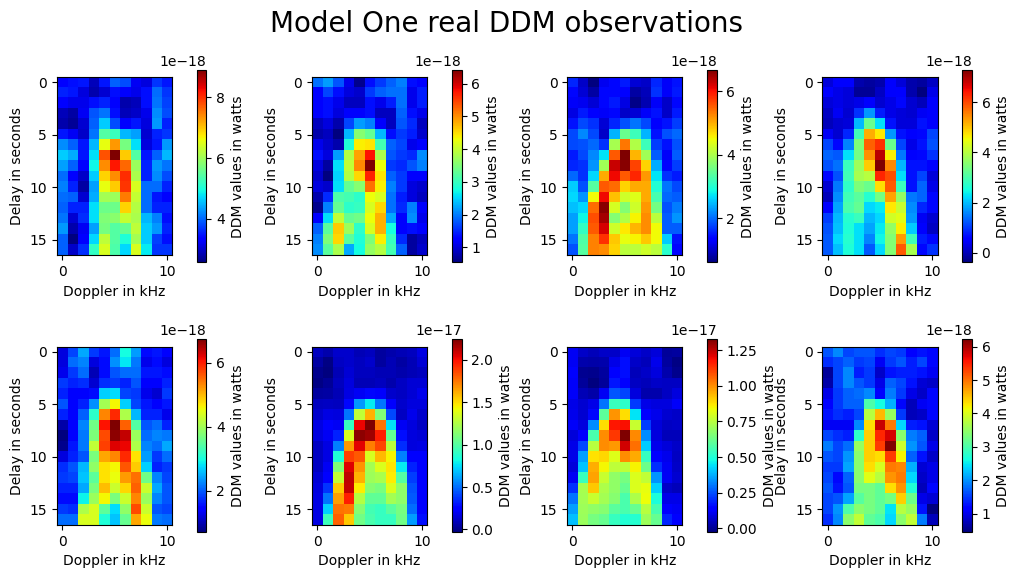

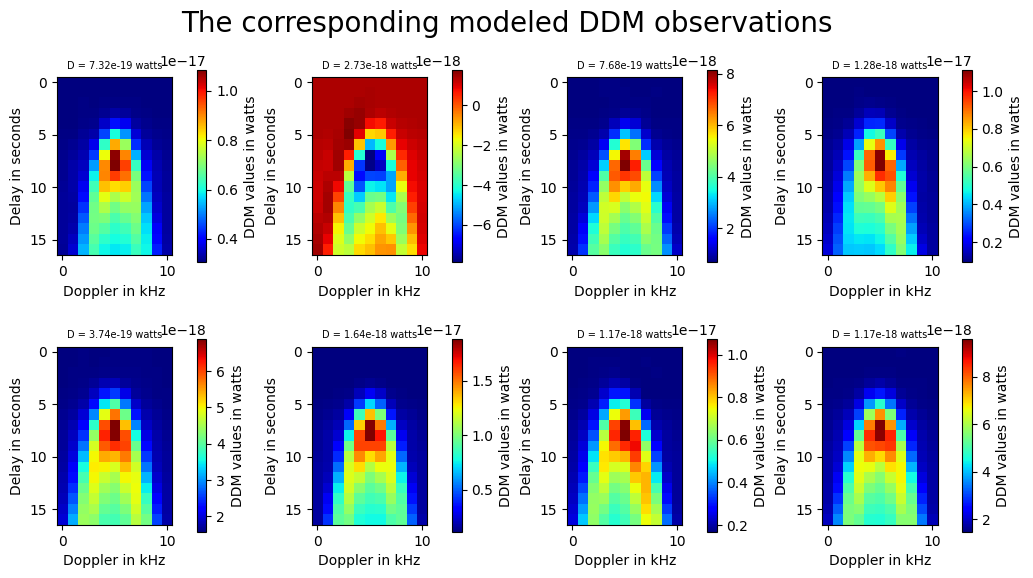

In [ ]:
ddm_heatmaps(cygnss_ml_data, 'Model One')

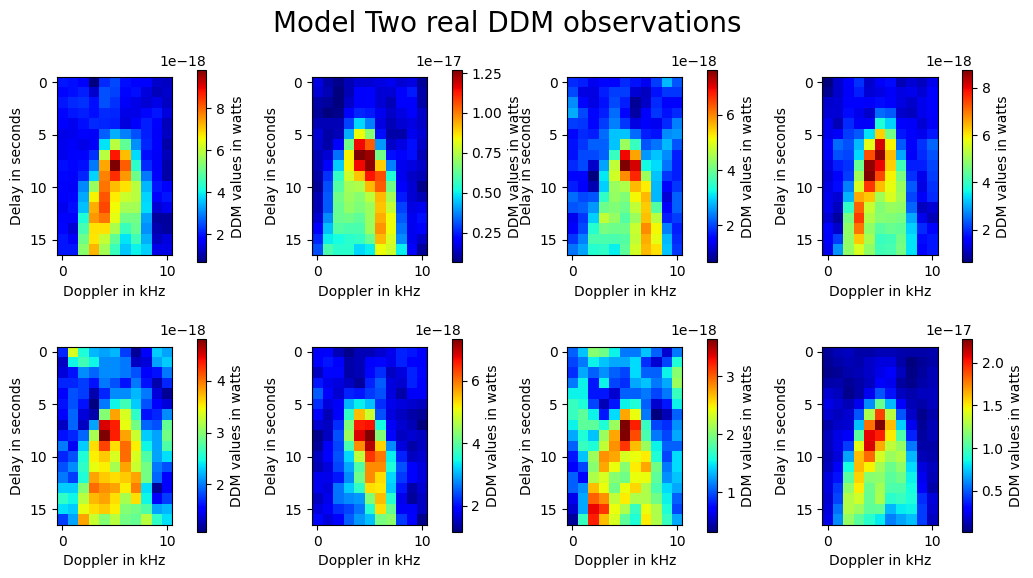

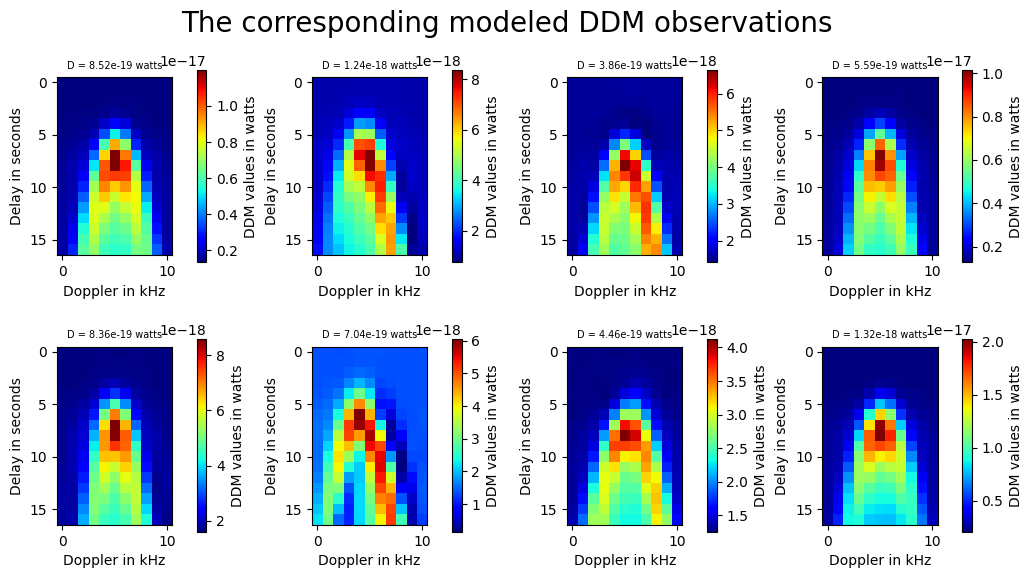

In [ ]:
ddm_heatmaps(cygnss_ml_data_new, 'Model Two')

For the two plots above, we took eight random samples of real and their corresponding modeled observations for both models and plotted their heat maps. The more the alternating rows look similar, the better the accuracy of the modeled observations. To quantify their differences, we have also displayed their $D$ values in watts as titles on the modeled observations.

For the next heat maps, we look more closely on one observation and its corresponding modeled one for both models side by side.

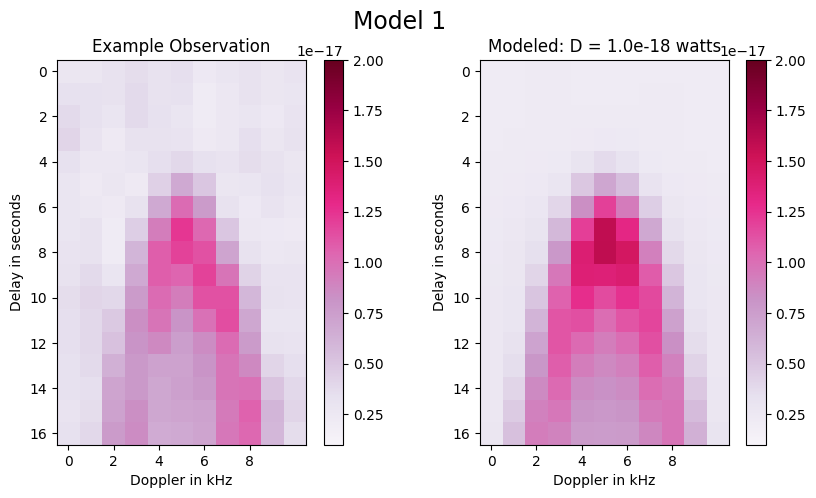

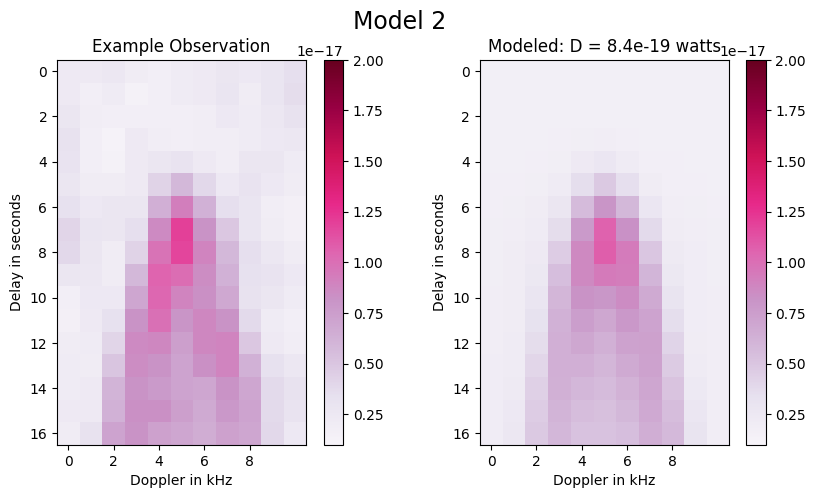

In [ ]:
#Calling the function to visualize example DDM for both datasets
visualize_ddm(cygnss_ml_data, cygnss_ml_data_new)

For the DDM plots for both models, the more the plots on the right match the ones on the left, the better the accuracy of the estimated or modeled observation. The $D$ values were also been added as titles for the modeled DDM heat maps on the right.

**Map plot of observations**

Warning: The following block of code may take more than a minute to execute.

In [ ]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
#world = gpd_data.get_path('naturalearth_lowres')

observations1 = gp.GeoSeries([Point(x,y) for x, y in zip(cygnss_ml_data.Lon,cygnss_ml_data.Lat)])
observations2 = gp.GeoSeries([Point(x,y) for x, y in zip(cygnss_ml_data_new.Lon,cygnss_ml_data_new.Lat)])

<ipython-input-23-dfb738ec08f4>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))


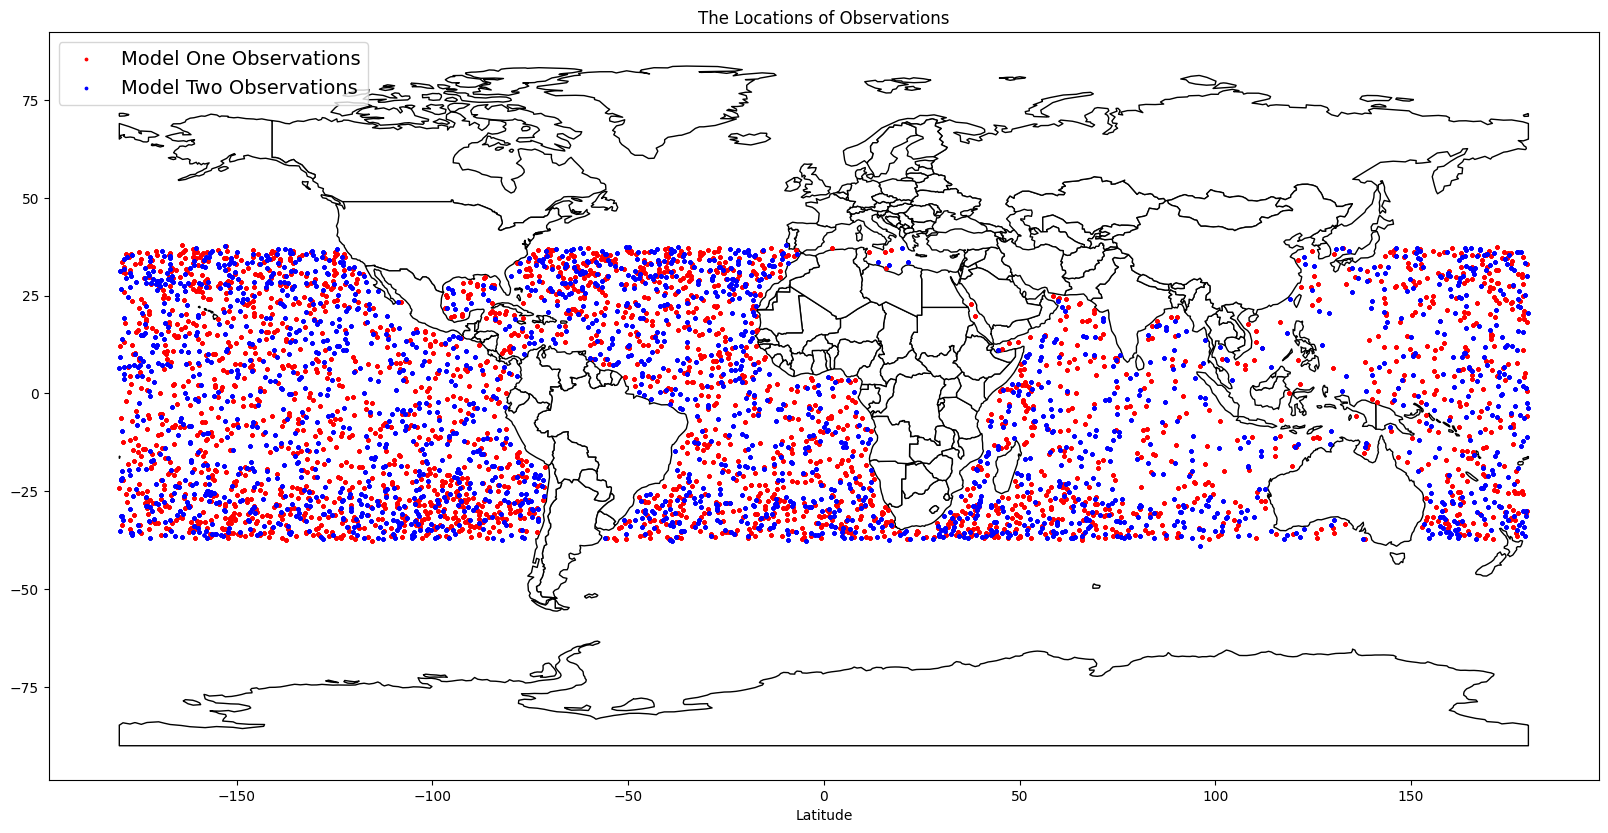

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

world.plot(ax=ax, color='white', edgecolor='black')
observations1.plot(ax=ax, marker='o', color='red', markersize=3)
observations2.plot(ax=ax, marker='o', color='blue', markersize=3)


ax.set_title('The Locations of Observations')
ax.set_xlabel('Longitude')
ax.set_xlabel('Latitude')
ax.legend(['Model One Observations', 'Model Two Observations'], fontsize='14', loc = 'upper left')
#plt.text(0,0,txt)
plt.show()

This map plots the location of the CYGNSS or real observations for both models on a map.
It can be seen that all observations are located within approximately 35 degrees
north and south of the equator.

The observations are also randomly distributed because they were shuffled when creating the training and validation sets.
Source- Personal communication with sponsor

**Quiver plot for the wind field around observations:**

Background winds in a 125x125 km grid around observation

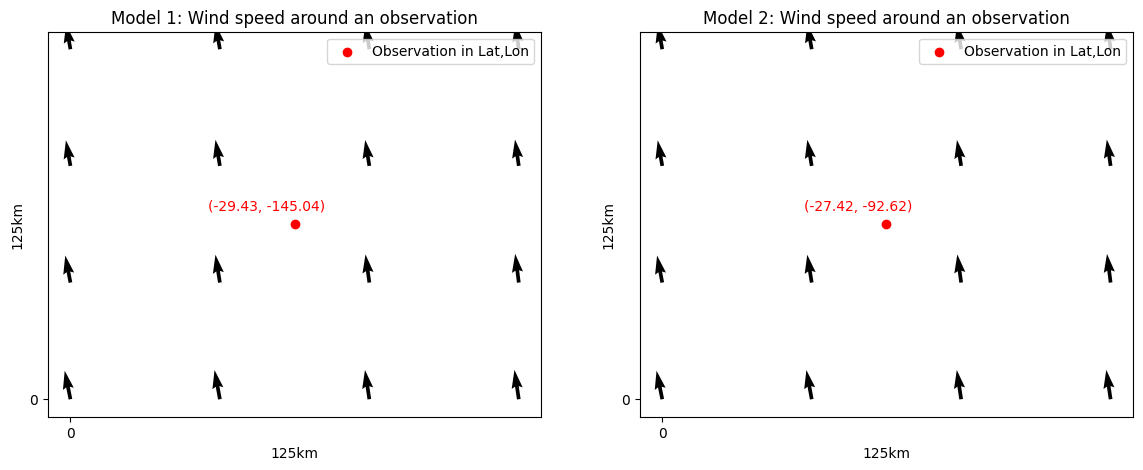

In [ ]:
#create a loop for two models with Lat and Lon
datasets = [('Model 1', cygnss_ml_data, sample_Lat, sample_Lon),
            ('Model 2', cygnss_ml_data_new, sample_Lat_new, sample_Lon_new)]

# Determine the boundaries using the latitude and longitude of observations
#create a grid of latitude and longitude values within the bounds of data
plot_data = []
for label, data, lat, lon in datasets:
    lat_min, lat_max = data.Lat.min(), data.Lat.max()
    lon_min, lon_max = data.Lon.min(), data.Lon.max()
    lat_float, lon_float = float(lat), float(lon)

    obs_lat_grid, obs_lon_grid = latlon_quiver(lat_float, lon_float, float(lat_min), float(lat_max), float(lon_min), float(lon_max), (ng, ng))

    plot_data.append((label, obs_lat_grid, obs_lon_grid, lat_float, lon_float))

# put the observations in the center of the quiver plot
center_lat_grid, center_lon_grid = (ng - 1) / 2, (ng - 1) / 2
#create a 1*2 subplot for two models
# Plot the quiver plot for two models
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, (label, obs_lat, obs_lon, lat_float, lon_float) in zip(axes, plot_data):
    plot_wind_speed(ax, sample_U, sample_V, center_lat_grid, center_lon_grid, f'{label}: Wind speed around an observation', lat_float, lon_float)

plt.show()


##Mean Absolute Error (D) and RMSE (R) by binning

####Definition of mean DDM and Wind speed statistics

The mean, maximum and minimum wind speeds for
each pair of observation were defined for both models and were then added to their respective datasets.

In [ ]:
variables = {
    'W': ['Wind_U', 'Wind_V'],
    'Y_obs_mean': ['Y_obs'],
}

# Define the statistics to calculate and their associated functions
statistics = {
    'mean': np.mean,
    'max': np.max,
    'min': np.min,
}

# Loop over the variables and statistics to calculate the mean, max, and min
for var_name, var_keys in variables.items():

    if len(var_keys) == 2:
      var_values = np.sqrt(cygnss_ml_data[var_keys[0]].values**2 + cygnss_ml_data[var_keys[1]].values**2)
      for stat_name, stat_func in statistics.items():
          stat_values = []
          for i in var_values:
              stat_value = stat_func(i)
              stat_values.append(stat_value)
          stat_array = np.array(stat_values)
          cygnss_ml_data[f'{stat_name}_{var_name}'] = xr.DataArray(stat_array, coords=cygnss_ml_data['Lat'].coords, dims=cygnss_ml_data['Lat'].dims)


    if len(var_keys) == 1:
      var_values = np.sqrt(cygnss_ml_data[var_keys[0]].values**2)
      for stat_name, stat_func in statistics.items():
        stat_values = []
        for i in var_values:
            stat_value = stat_func(i)
            stat_values.append(stat_value)
        stat_array = np.array(stat_values)
        cygnss_ml_data[f'{stat_name}_{var_name}'] = xr.DataArray(stat_array, coords=cygnss_ml_data['Lat'].coords, dims=cygnss_ml_data['Lat'].dims)


    # Repeat for the second dataset
    if len(var_keys) == 2:
        var_values = np.sqrt(cygnss_ml_data_new[var_keys[0]].values**2 + cygnss_ml_data_new[var_keys[1]].values**2)
        for stat_name, stat_func in statistics.items():
            stat_values = []
            for i in var_values:
                stat_value = stat_func(i)
                stat_values.append(stat_value)
            stat_array = np.array(stat_values)
            cygnss_ml_data_new[f'{stat_name}_{var_name}'] = xr.DataArray(stat_array, coords=cygnss_ml_data_new['Lat'].coords, dims=cygnss_ml_data_new['Lat'].dims)

    if len(var_keys) == 1:
        var_values = np.sqrt(cygnss_ml_data_new[var_keys[0]].values**2)
        for stat_name, stat_func in statistics.items():
          stat_values = []
          for i in var_values:
            stat_value = stat_func(i)
            stat_values.append(stat_value)
          stat_array = np.array(stat_values)
          cygnss_ml_data_new[f'{stat_name}_{var_name}'] = xr.DataArray(stat_array, coords=cygnss_ml_data_new['Lat'].coords, dims=cygnss_ml_data_new['Lat'].dims)



In [ ]:
variables = {
    'mean_W': ['mean_W'],

    'max_W': ['max_W'],

    'min_W': ['min_W'],


}

# Define the statistics to calculate and their associated functions
statistics = {
    'median': np.median
}

# Loop over the variables and statistics to calculate the mean, max, and min
for var_name, var_keys in variables.items():

    if len(var_keys) == 1:
      var_values = np.sqrt(cygnss_ml_data[var_keys[0]].values**2)
      for stat_name, stat_func in statistics.items():
        stat_values = []
        for i in var_values:
            stat_value = stat_func(i)
            stat_values.append(stat_value)
        stat_array = np.array(stat_values)
        cygnss_ml_data[f'{stat_name}_{var_name}'] = xr.DataArray(stat_array, coords=cygnss_ml_data['Lat'].coords, dims=cygnss_ml_data['Lat'].dims)


    # Repeat for the second dataset


    if len(var_keys) == 1:
        var_values = np.sqrt(cygnss_ml_data_new[var_keys[0]].values**2)
        for stat_name, stat_func in statistics.items():
          stat_values = []
          for i in var_values:
            stat_value = stat_func(i)
            stat_values.append(stat_value)
          stat_array = np.array(stat_values)
          cygnss_ml_data_new[f'{stat_name}_{var_name}'] = xr.DataArray(stat_array, coords=cygnss_ml_data_new['Lat'].coords, dims=cygnss_ml_data_new['Lat'].dims)

In [ ]:
cygnss_ml_data

<xarray.Dataset>
Dimensions:          (nobs: 39696, ngrid: 4, delay: 17, doppler: 11)
Coordinates:
  * nobs             (nobs) int64 0 1 2 3 4 5 ... 39691 39692 39693 39694 39695
  * ngrid            (ngrid) int64 0 1 2 3
  * delay            (delay) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * doppler          (doppler) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables: (12/16)
    Lat              (nobs) float32 27.49 27.49 27.49 ... -29.02 -29.02 -29.02
    Lon              (nobs) float32 -137.5 -137.5 -137.5 ... 39.75 39.75 39.75
    Instrument       (nobs) float32 ...
    Wind_U           (nobs, ngrid, ngrid) float32 -4.719 -4.041 ... 0.4839
    Wind_V           (nobs, ngrid, ngrid) float32 -3.12 -3.269 ... 8.226 8.22
    Y_obs            (nobs, delay, doppler) float32 4.318e-18 ... 2.46e-18
    ...               ...
    mean_Y_obs_mean  (nobs) float32 4.811e-18 4.811e-18 ... 4.369e-18 4.369e-18
    max_Y_obs_mean   (nobs) float32 7.667e-18 7.667e-18 ... 8.991e-18 8.991e-18
    min_Y_obs_mean   (nobs) float32 2.772e-18 2.772e-18 ... 2.238e-18 2.238e-18
    median_mean_W    (nobs) float32 5.186 5.186 5.186 ... 8.787 8.787 8.787
    median_max_W     (nobs) float32 6.262 6.262 6.262 ... 9.695 9.695 9.695
    median_min_W     (nobs) float32 4.781 4.781 4.781 ... 8.193 8.193 8.193
Attributes:
    description:  Validation set for the CYGNSS ML Operator

In [ ]:
cygnss_ml_data_new

<xarray.Dataset>
Dimensions:          (nobs: 31776, ngrid: 4, delay: 17, doppler: 11)
Coordinates:
  * nobs             (nobs) int64 0 1 2 3 4 5 ... 31771 31772 31773 31774 31775
  * ngrid            (ngrid) int64 0 1 2 3
  * delay            (delay) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * doppler          (doppler) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables: (12/16)
    Lat              (nobs) float32 26.48 26.48 26.48 ... -36.19 -36.19 -36.19
    Lon              (nobs) float32 172.8 172.8 172.8 ... -158.4 -158.4 -158.4
    Instrument       (nobs) float32 ...
    Wind_U           (nobs, ngrid, ngrid) float32 3.202 3.126 ... 2.383 2.367
    Wind_V           (nobs, ngrid, ngrid) float32 1.813 0.7122 ... -6.748 -6.171
    Y_obs            (nobs, delay, doppler) float32 1.626e-18 ... 1.944e-18
    ...               ...
    mean_Y_obs_mean  (nobs) float32 2.658e-18 2.658e-18 ... 2.8e-18 2.8e-18
    max_Y_obs_mean   (nobs) float32 5.657e-18 5.657e-18 ... 6.504e-18 6.504e-18
    min_Y_obs_mean   (nobs) float32 1.073e-18 1.073e-18 ... 1.003e-18 1.003e-18
    median_mean_W    (nobs) float32 3.577 3.577 3.577 ... 6.982 6.982 6.982
    median_max_W     (nobs) float32 5.085 5.085 5.085 ... 7.966 7.966 7.966
    median_min_W     (nobs) float32 3.069 3.069 3.069 ... 6.533 6.533 6.533
Attributes:
    description:  Validation set for the CYGNSS ML Operator

###Computation of D and R###

We will be calculating the error metrics $D$ and $R$ for both models in the next cell.

In [ ]:
#get D, R, bin_data by a loop over models 1 & 2, over bin counts 8 and 16, over statistic choices min, mean, max.
D = []
R = []
bin_data = []

cygnss_ml_data_sets = [cygnss_ml_data, cygnss_ml_data_new]
W_values = ["mean_W", "max_W", "min_W"]
bin_sizes = [8, 16]

data_sets = []
for bin_size in bin_sizes:
     for data_set in cygnss_ml_data_sets:
          for W in W_values:
            data_sets.append((data_set, W, bin_size))

for data_set in data_sets:
    D_bin, R_bin, bin_data_bin = calculate_DandR(data_set[0], data_set[1], data_set[2], "Y_model", "Y_obs", dm3)
    D.append(D_bin)
    R.append(R_bin)
    bin_data.append(bin_data_bin)

# D[0] and D[1] and D[2]: Model 1 D values for 8 bins by using mean, max, min wind speeds respectively
# D[3] and D[4] and D[5]: Model 2 D values for 8 bins by using mean, max, min wind speeds respectively
# D[6] and D[7] and D[8]: Model 1 D values for 16 bins by using mean, max, min wind speeds respectively
# D[9] and D[10] and D[11]: Model 2 D values for 16 bins by using mean, max, min wind speed and respectively

# same for R and bin_data:
# R[0] and R[1] and R[2]: Model 1 R values for 8 bins by using mean, max, min wind speeds respectively
# R[3] and R[4] and R[5]: Model 2 R values for 8 bins by using mean, max, min wind speeds respectively
# R[6] and R[7] and R[8]: Model 1 R values for 16 bins by using mean, max, min wind speeds respectively
# R[9] and R[10] and R[11]: Model 2 R values for 16 bins by using mean, max, min wind speed and respectively



##PSNR (The peak signal-to-noise ratio)

The next metric we compute is the PSNR for both models when they are discretized into 16 bins. We initially perfomed this on 8 bins, but later changed it to 16 bins to have more $PSNR$ values to compare the two models performace.

#####Maximum possible peak value

In [ ]:
# The max possible peak value depends on the range of values used to
# represent the image

# For each bin, the max possible peak value was selected by searching for
# the maximum value in the 17 x 11 DDM array of the real observation

# Get the max possible peak value for the 2 datasets and
# Get the indices of max values to plot the heat maps of the obs they belong to

max_possible_peak_values = []
max_possible_peak_indices = []
for i, dataset in enumerate([bin_data[6], bin_data[9]]):
    max_possible_peak_values.append([])
    max_possible_peak_indices.append([])
    for j, values in dataset.items():
        Y_obs_values = values["Y_obs"].values
        max_value_index_flat = np.argmax(Y_obs_values)
        max_value_index = np.unravel_index(max_value_index_flat, Y_obs_values.shape)
        max_value = Y_obs_values[max_value_index]
        max_possible_peak_values[i].append(max_value)
        max_possible_peak_indices[i].append(max_value_index)

nobs_indices = [[idx[0] for idx in sublist] for sublist in max_possible_peak_indices]


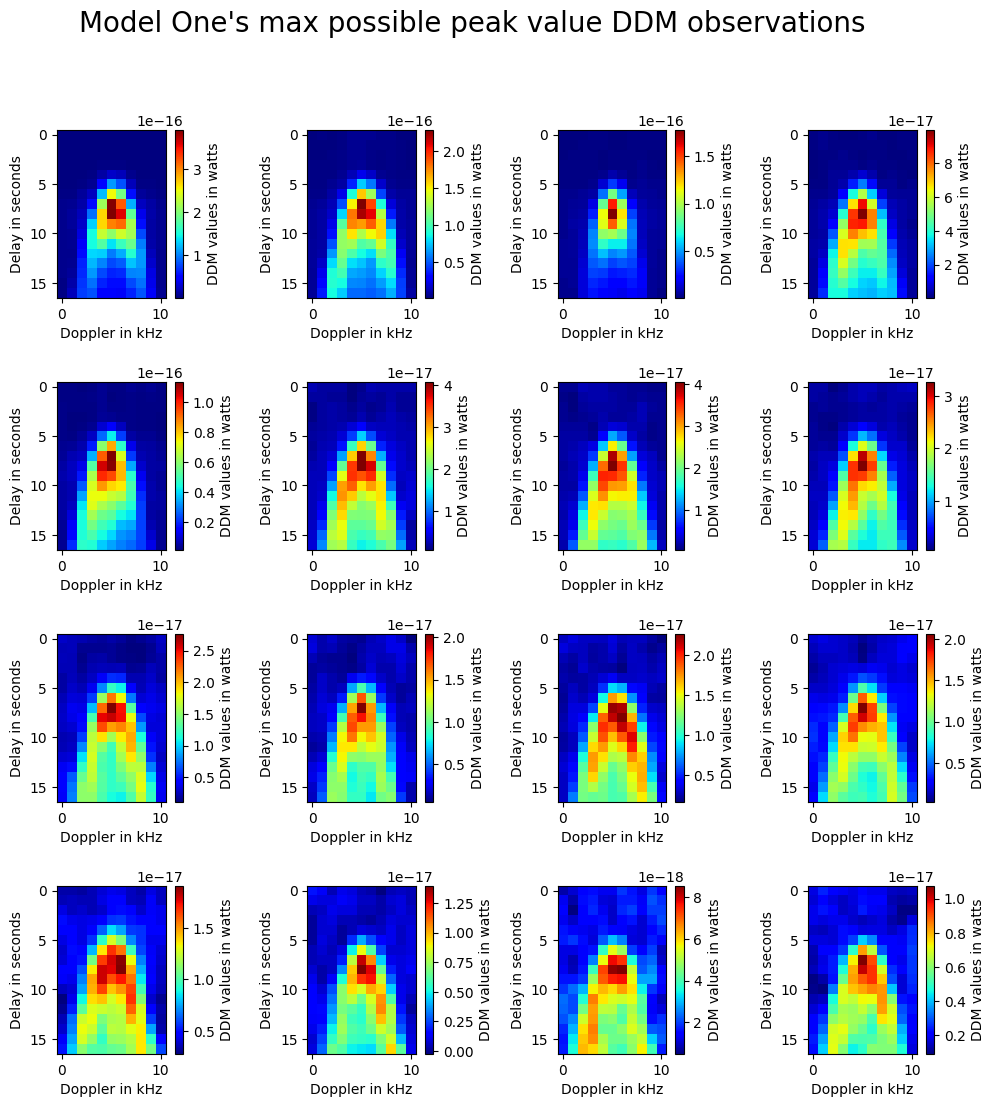

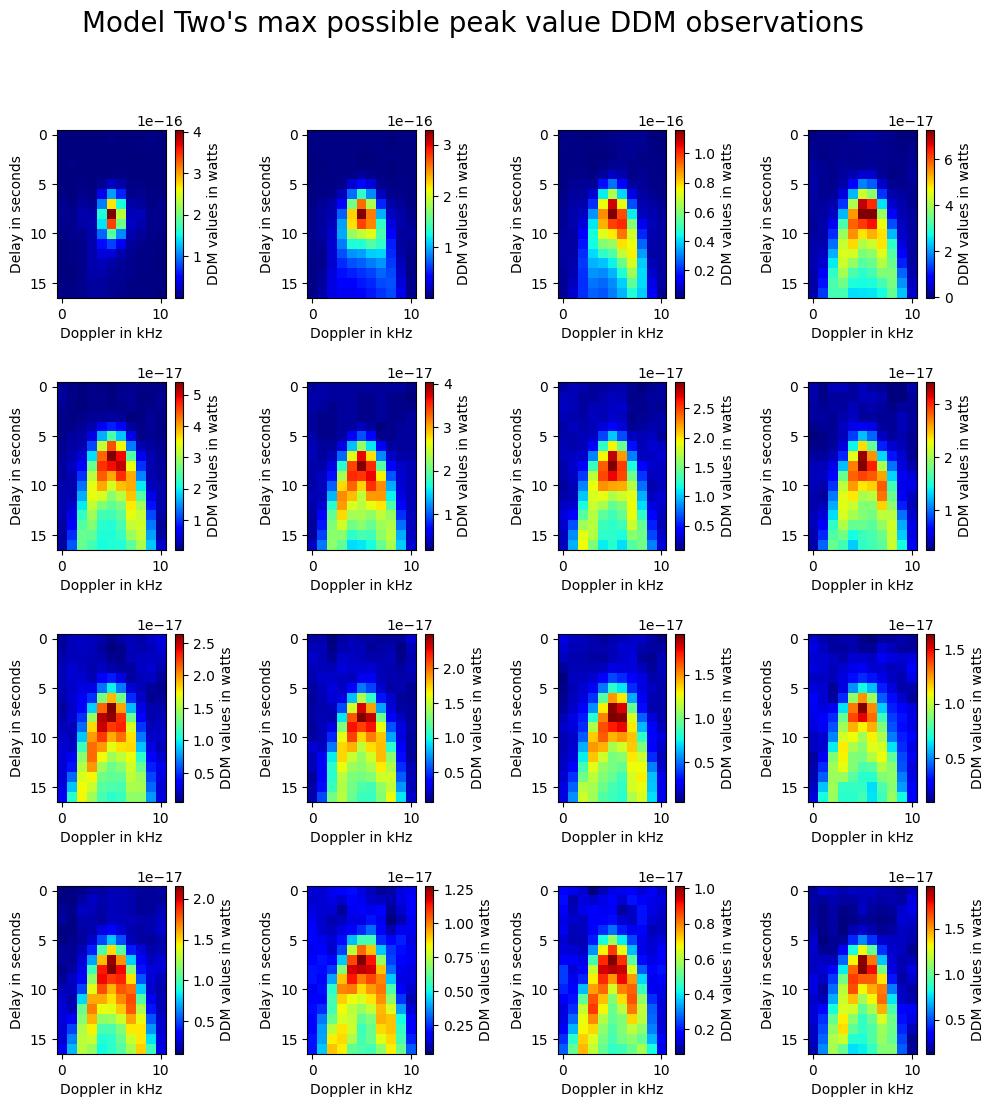

In [ ]:
# calling the plotting function
ddm_max_heatmaps(bin_data[6], 'Model One', bin_data[9], 'Model Two', nobs_indices)


These are the heat maps of the real DDM observations that contain the max possible peak value that will be used for PSNR calculation. Since we are using 16 bins for the calculation, we have 32 real DDM heat maps for both models.

#####Computation of PSNR

In [ ]:
multiplier = 10 # It is 10 since we will be squaring the P and R as noted in the formula above

# Use a dictionary for PSNR lists for each model
PSNR_dict = {
    "model1": [],
    "model2": []
}

# R[6]: R values for 16 bins by using mean for Model 1
# R[9]: R values for 16 bins by using mean for Model 2
# max_possible_peak_values[0]: max possible values for Model 1
# max_possible_peak_values[1]: max possible values for Model 2

# define each model using their corresponding max possible values lists and R lists
models = [
    ("model1", 6, 0),
    ("model2", 9, 1),
]

# loop over each model
for model_name, R_index, max_values_index in models:
    # Loop through lists and calculate PSNR values for each model
    for i in range(len(R[R_index])):
        P = max_possible_peak_values[max_values_index][i]
        r = R[R_index][i]
        PSNR = multiplier * math.log10((P**2) / (r**2)) # R^2 gives the MSE
        PSNR_dict[model_name].append(PSNR)

# Print the PSNR for each of the 16 bins in each model
for model_name, PSNR_list in PSNR_dict.items():
    print(f"The PSNR in dB for each of the 16 bins in {model_name}:\n{PSNR_list}")

The PSNR in dB for each of the 16 bins in model1:
[22.872340987944895, 24.95075087750173, 27.878994835183924, 27.992214712111533, 30.68774631570159, 25.048103338544614, 26.17998136351325, 25.16462874501789, 23.626715289595555, 21.89887800153151, 21.889598815126817, 19.408355329753658, 16.617504139010247, 14.06941921438313, 8.442470691631726, 9.917525097844713]
The PSNR in dB for each of the 16 bins in model2:
[29.79540336403831, 32.00374202363329, 27.681204036332282, 28.275903372045, 28.227506466304888, 28.905739317741546, 25.769160522683904, 27.45084505820769, 25.95371003972175, 25.118415106460912, 23.946151580201146, 23.880380035018085, 23.20470984166985, 19.097310037424215, 17.796566346795483, 20.903680947314747]


## Normalized Error

Since the RMSE or $R$ for each bin has already been calculated previously, we proceed to find the standard deviation of the real observations in the corresponding bin and divide the R by it. This was done for all the bins.

In [ ]:
# Find the standard deviation of real obs in each bin
#bin_data1 is a dictionary containing the discretized/binned subsets of
#dataset 1/model 1

sd = []
for i in range(1, 9):
  std_values = np.std(bin_data[0][f'bin{i}']['Y_obs'])
  sd.append(std_values)
stddev = np.array(sd)
print(stddev)

#an alternative way to check and see if the std devs are the same
std_ = []
for key in bin_data[0].keys():
  std_.append(bin_data[0][key]['Y_obs'].std())
print(std_)

[2.0438589e-17 7.9915532e-18 4.4637917e-18 3.4802826e-18 3.0771557e-18
 2.8768777e-18 2.8696043e-18 1.7121492e-18]
[<xarray.DataArray 'Y_obs' ()>
array(2.0438589e-17, dtype=float32), <xarray.DataArray 'Y_obs' ()>
array(7.991553e-18, dtype=float32), <xarray.DataArray 'Y_obs' ()>
array(4.4637917e-18, dtype=float32), <xarray.DataArray 'Y_obs' ()>
array(3.4802826e-18, dtype=float32), <xarray.DataArray 'Y_obs' ()>
array(3.0771557e-18, dtype=float32), <xarray.DataArray 'Y_obs' ()>
array(2.8768777e-18, dtype=float32), <xarray.DataArray 'Y_obs' ()>
array(2.8696043e-18, dtype=float32), <xarray.DataArray 'Y_obs' ()>
array(1.7121492e-18, dtype=float32)]


Since the standard deviation both ways is the same, either way works to calculate it.

In [ ]:

# Normalized RMSE for 8bins and 16 bins for both models
NR_list = []
for i in range(len(bin_data)):
    NR_list.append(calculate_NR(bin_data[i], R[i]))

# NR_list[0] and NR_list[1] and NR_list[2]: NR value for model 1 by using mean, max, min value and 8 bins.
# NR_list[3] and NR_list[4] and NR_list[5]: NR value for model 2 by using mean, max, min value and 8 bins.
# NR_list[6] and NR_list[7] and NR_list[8]: NR value for model 1 by using mean, max, min value and 16 bins.
# NR_list[9] and NR_list[10] and NR_list[11]: NR value for model 2 by using mean, max, min value and 16 bins.

##Visualization of binned datasets##


We now visualize the subsets of our data.

In [ ]:
#The indices_list pair represents the mean_W, max_W, min_W for model 1 and model 2
##(0, 3) represents mean wind speed model 1 and model 2;
##(1, 4) represents max wind speed model 1 and model 2;
##(2, 5) represents min wind speed model 1 and model 2;

indices_list = [(0, 3), (1, 4), (2, 5)]
keys = ['mean_W', 'max_W', 'min_W']

Max_mean_value_list1, Max_mean_value_list2 = calculate_max_values(bin_data, indices_list[0], keys[0])
Max_max_value_list1, Max_max_value_list2 = calculate_max_values(bin_data, indices_list[1], keys[1])
Max_min_value_list1, Max_min_value_list2 = calculate_max_values(bin_data, indices_list[2], keys[2])


In [ ]:
# create dictionary with two keys for all_Y_obs_mean_values; mean, max, min_w_values, each key maps to another dictionary
visualdata_dict = {
    "all_Y_obs_mean_values": {1: [], 2: [], 3: []},
    "W_values": {"mean": [], "max": [], "min": []}
}

#create a list for looping over bin_data and all_Y_obs_mean_values dicts, also generate W_values in bins
indices = [(0, 3, 1, "mean"), (1, 4, 2, "max"), (2, 5, 3, "min")]

for index, bin_index, dict_key, W_key in indices:
    for i in (index, bin_index):
        bin_data_W = bin_data[i]
        Y_obs_mean_values = []
        W_values = []
        for j in range(1, 9):
            bin = bin_data_W[f'bin{j}']
            Y_obs_mean_values.append([bin[f"mean_Y_obs_mean"]])
            W_values.append([bin[f"median_{W_key}_W"]])
        visualdata_dict["all_Y_obs_mean_values"][dict_key].append(Y_obs_mean_values)
        visualdata_dict["W_values"][W_key].append(W_values)


In [ ]:
#title_names list contains the titles for three subplots in scatterplot
title_names = ['Mean DDMs vs Mean Wind Speed', 'Mean DDMs vs Maximum Wind Speed', 'Mean DDMs vs Minimum Wind Speed']
W_keys = ["mean", "max", "min"]

x_lists1 = [visualdata_dict["W_values"][key][0] for key in W_keys]
y_lists1 = [visualdata_dict["all_Y_obs_mean_values"][i][0] for i in range(1, 4)]
max_lists1 = [Max_mean_value_list1, Max_max_value_list1, Max_min_value_list1]

x_lists2 = [visualdata_dict["W_values"][key][1] for key in W_keys]
y_lists2 = [visualdata_dict["all_Y_obs_mean_values"][i][1] for i in range(1, 4)]
max_lists2 = [Max_mean_value_list2, Max_max_value_list2, Max_min_value_list2]


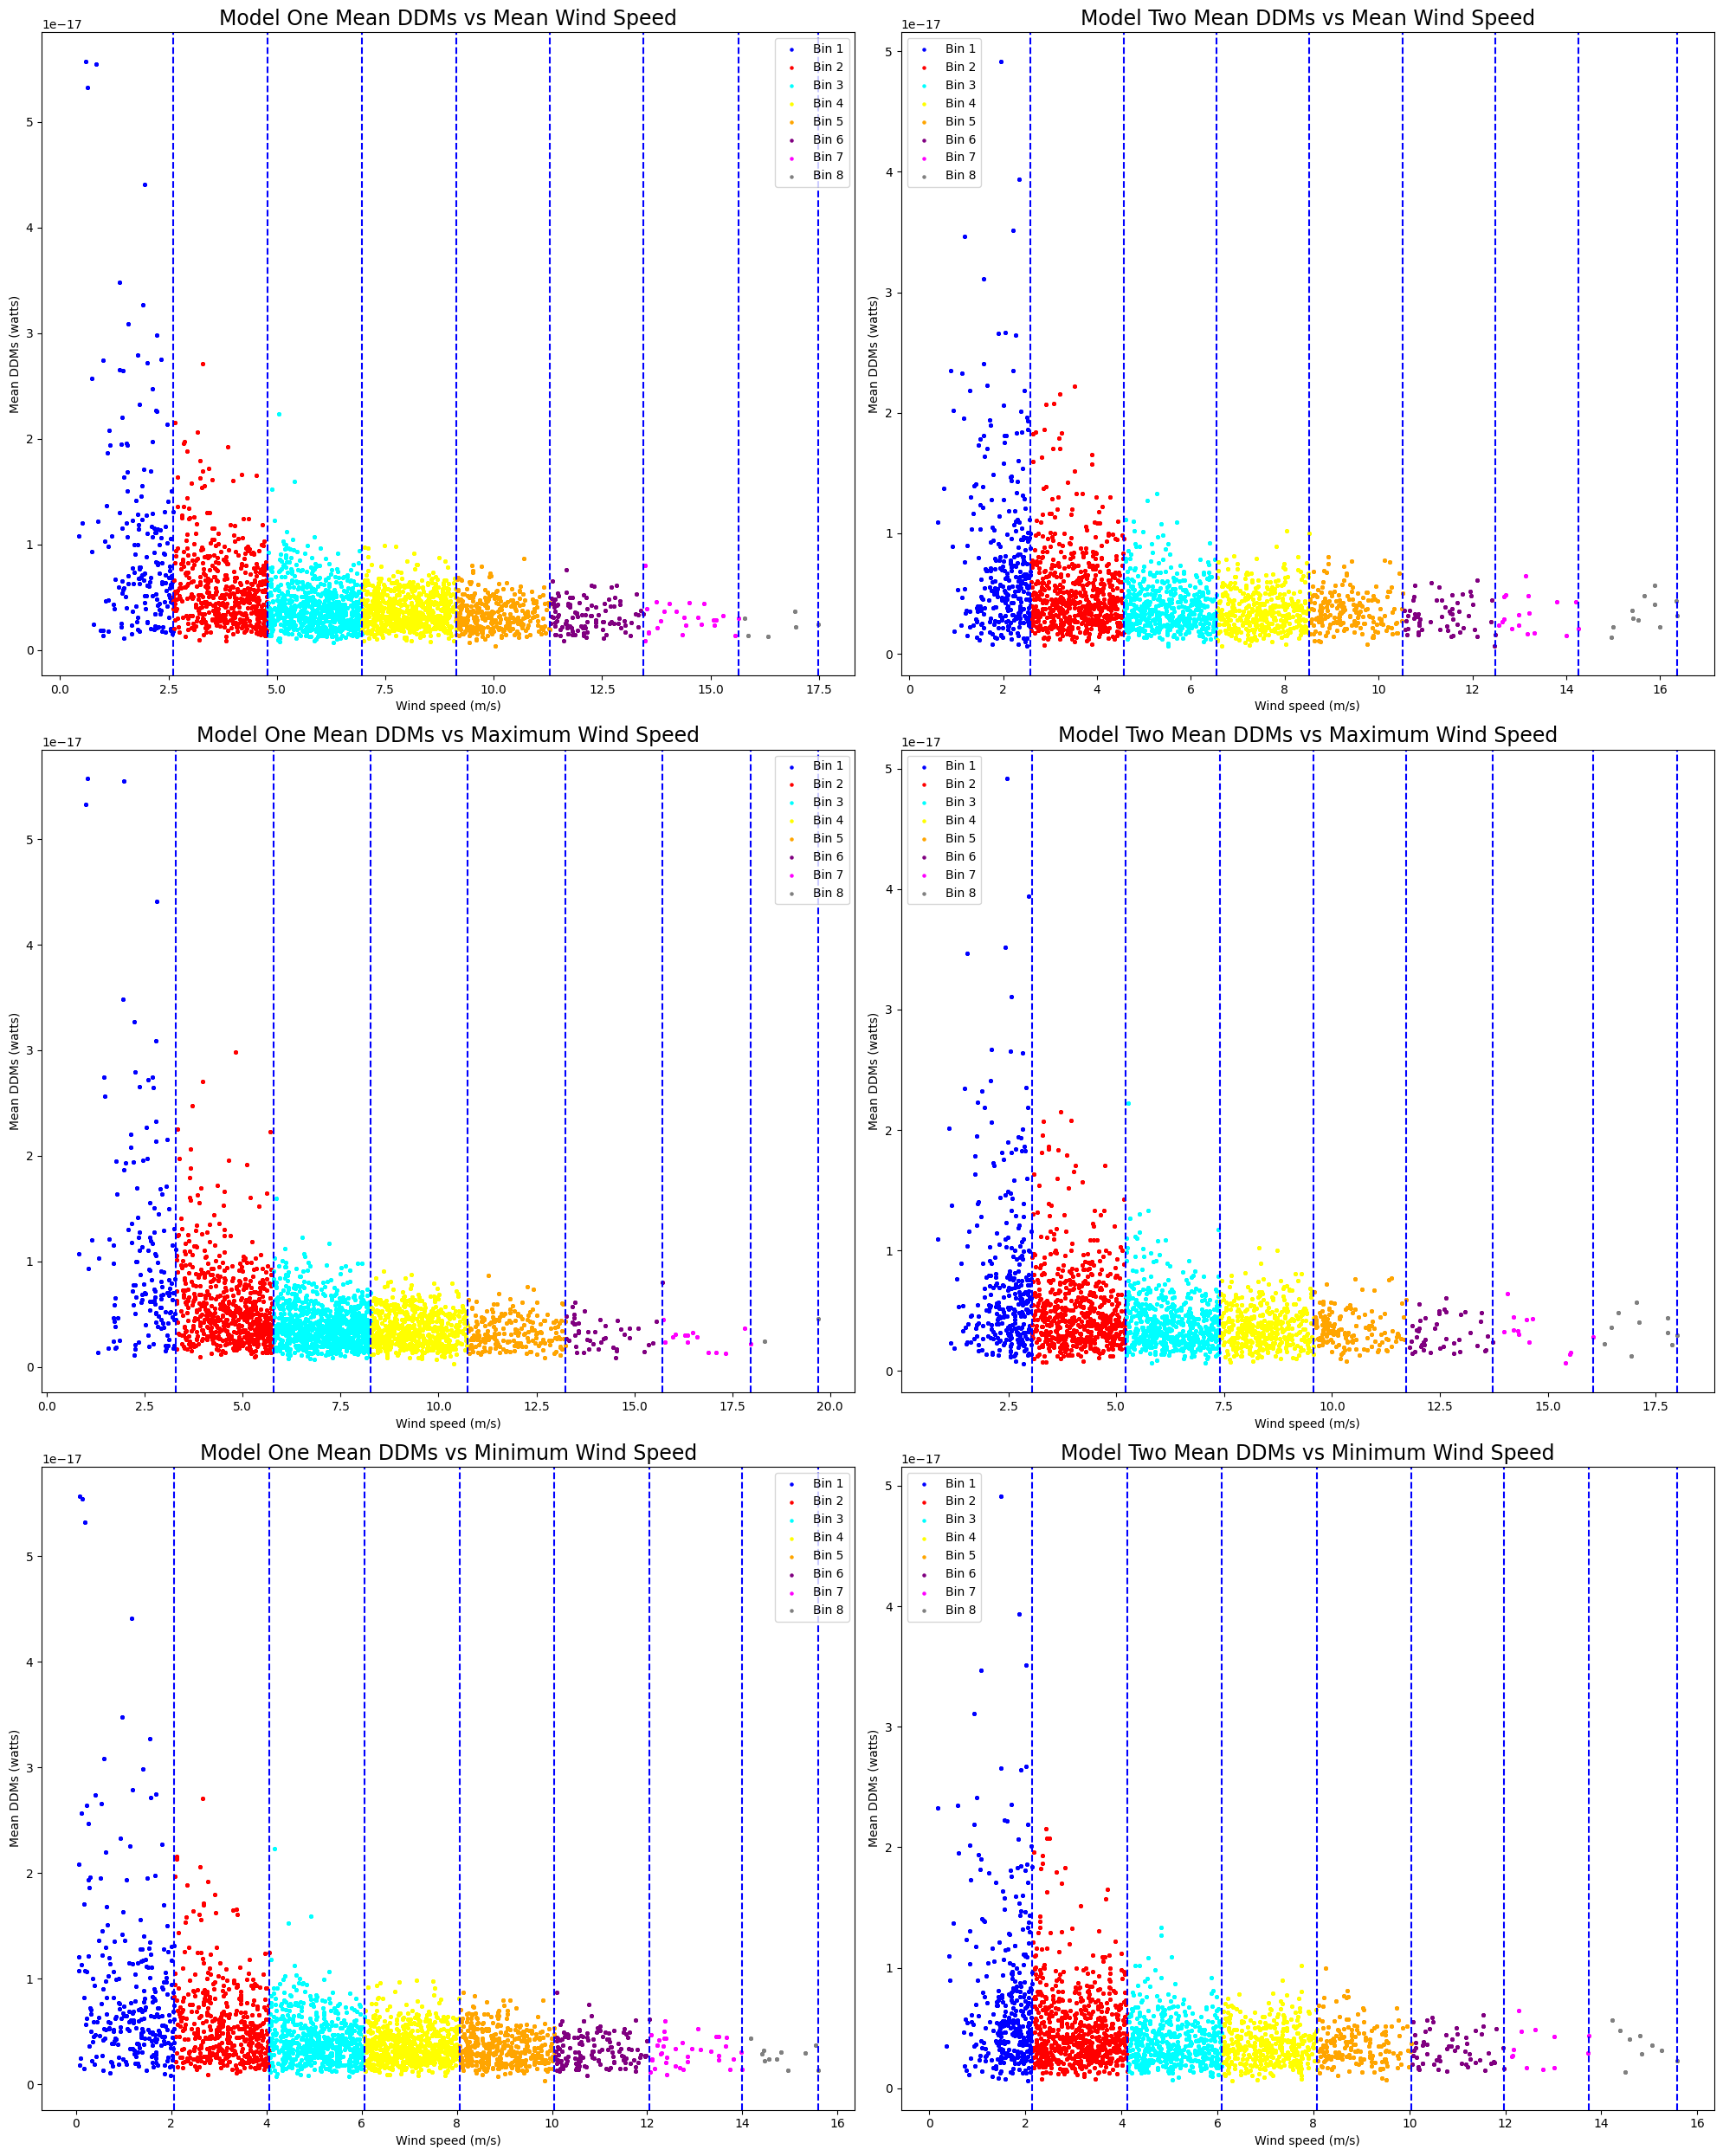

In [ ]:
# scatter plot for both models
scatter_function(x_lists1, y_lists1, max_lists1, x_lists2, y_lists2, max_lists2, title_names)

For all the above plots, we see that mean DDMs and all of the wind speed statistics have inverse relation. It is also apparent that we have few observations in the bins that have very high wind speed.

In [ ]:
#title_names list contains the titles for three subplots in histogram
title_hist = ['Histogram of Mean Wind Speed', 'Histogram of Maximum Wind Speed', 'Histogram of Minimum Wind Speed']
W_keys = ["mean", "max", "min"]

x_list1 = [visualdata_dict["W_values"][key][0] for key in W_keys]
x_list2 = [visualdata_dict["W_values"][key][1] for key in W_keys]

Next is the histogram plots for both models.

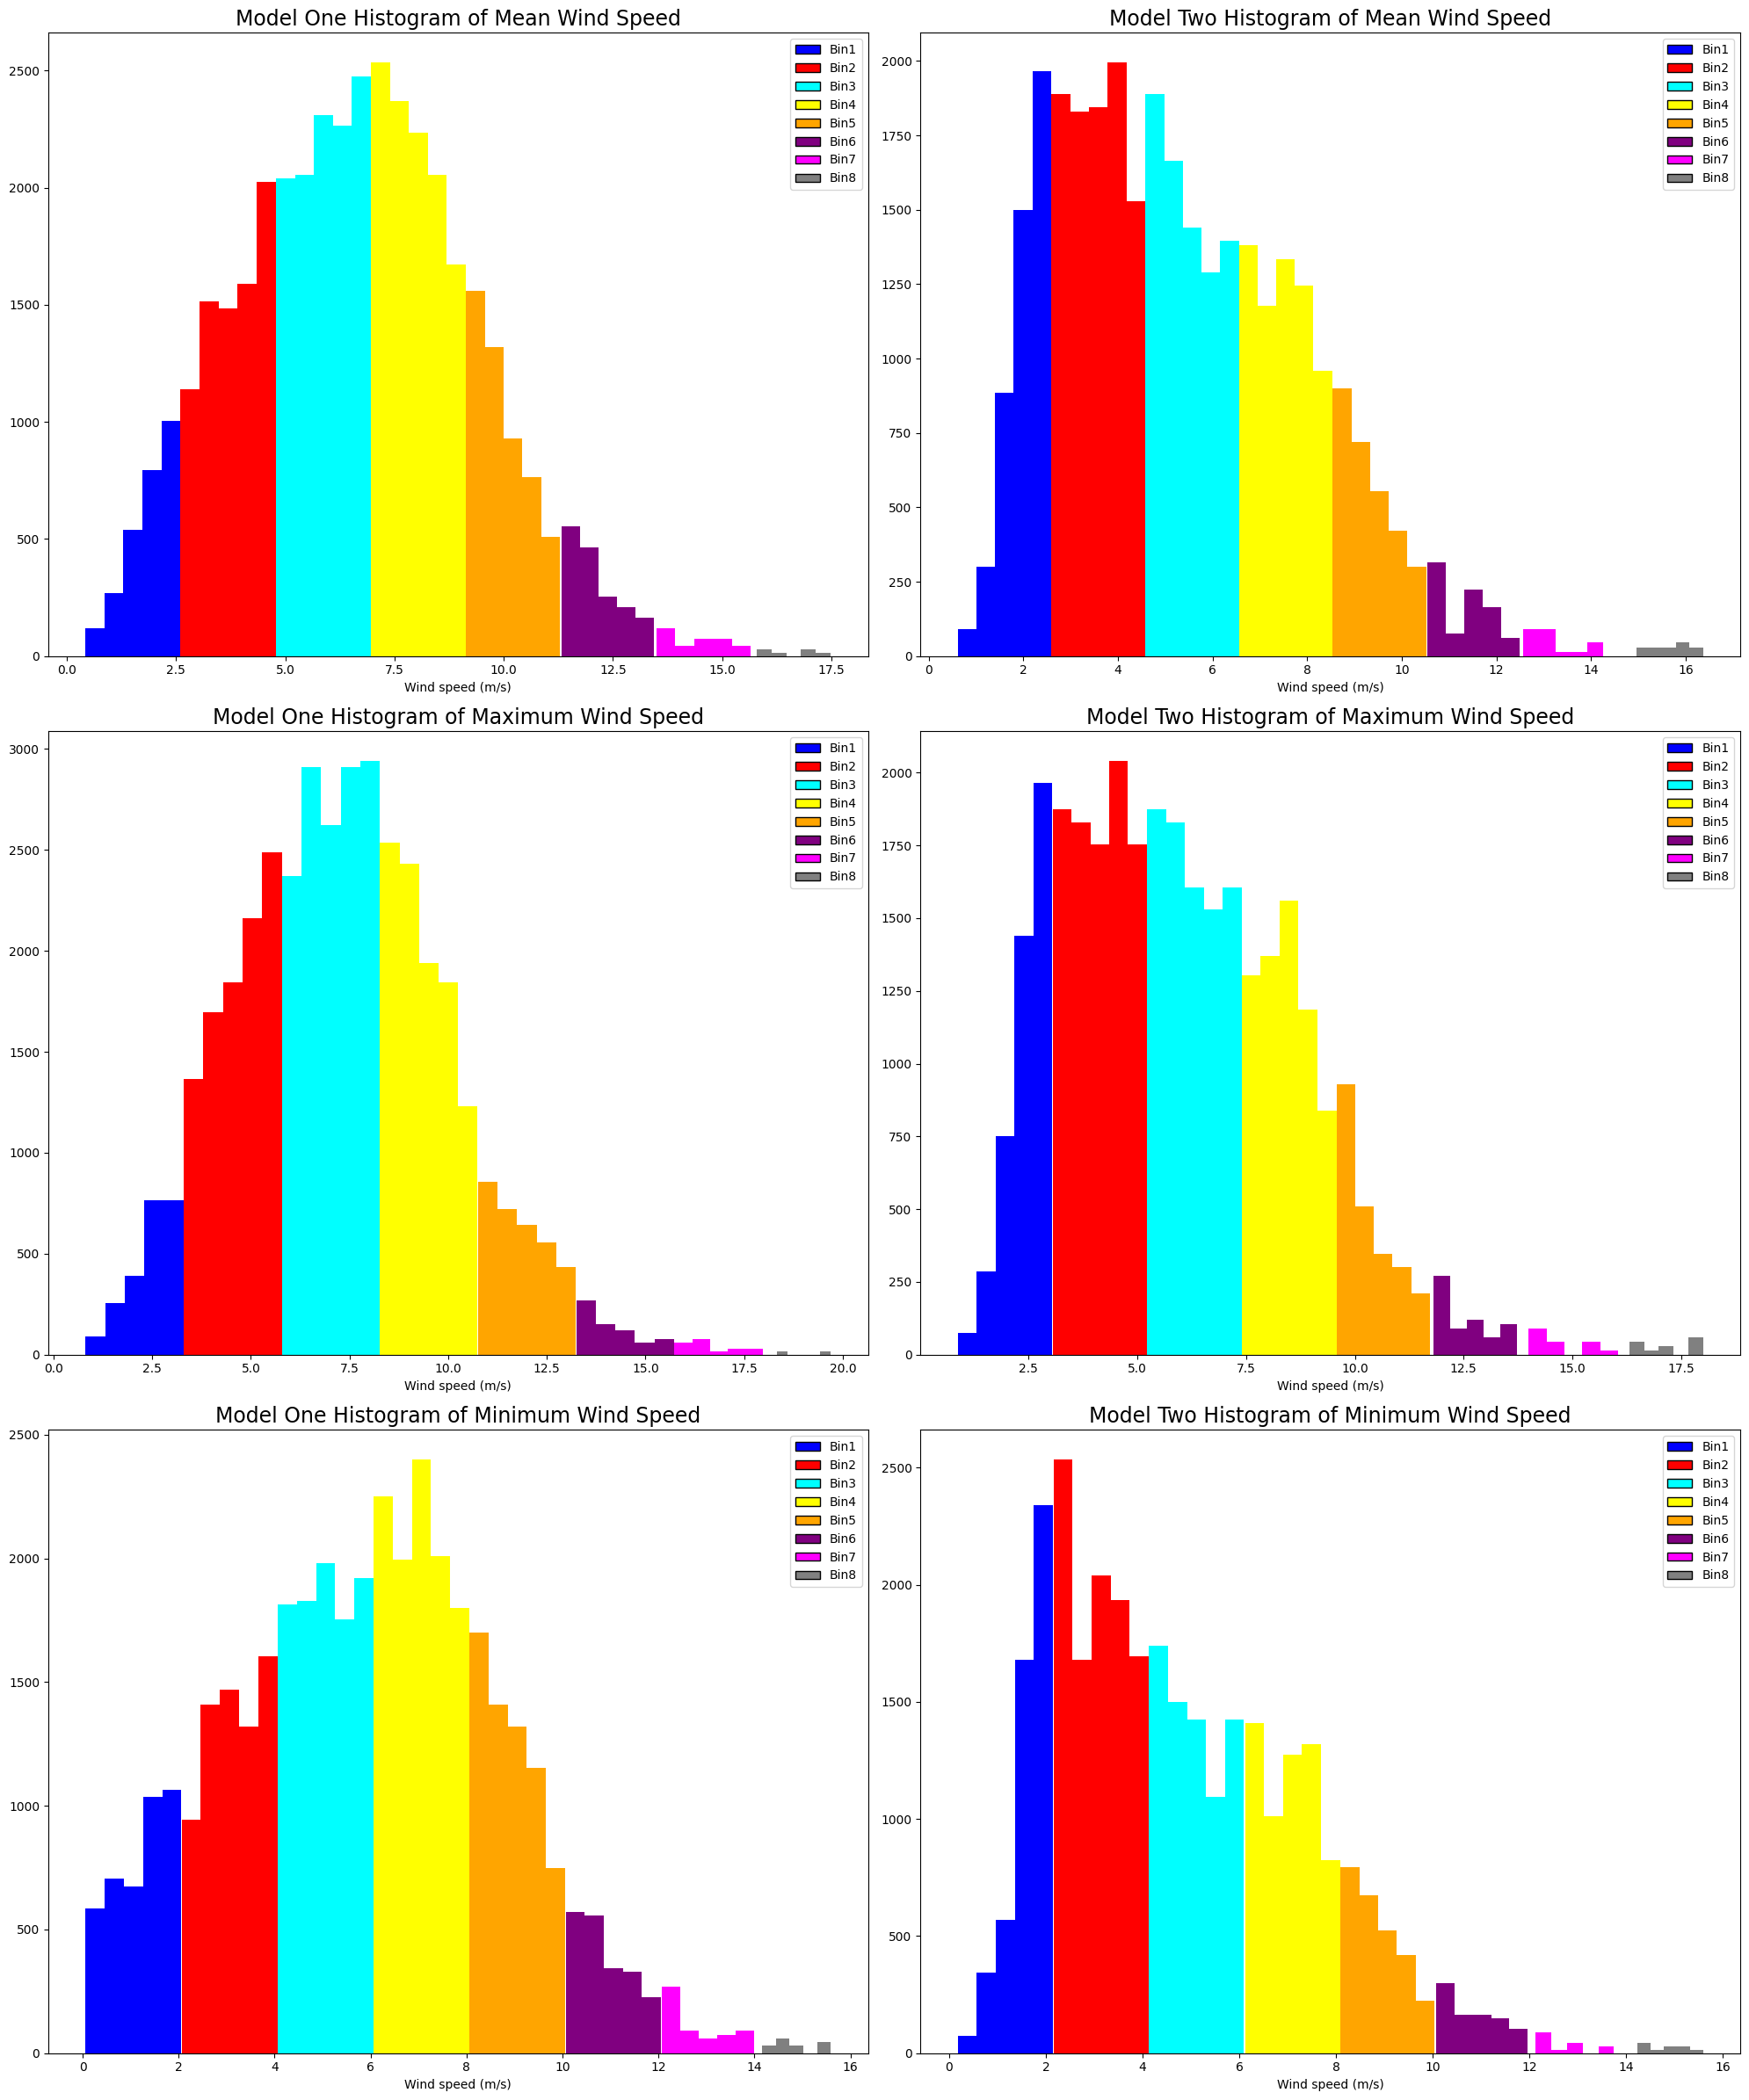

In [ ]:
# histogram plot
his_function(x_list1, x_list2, title_hist)

##Visualization and discussion of analysis result

Now that the D and R values have been computed for both the datasets using 8 and 16 bins, the next step would be visualizing these errors. As mentioned in the "Visualization Method" section, a bin's wind speed is represented by its center value.



######Visualization of D and R



D and R values against wind speed for both models

In [ ]:
x_axis_1 = []
for i in (0,3):
    median_mean_W_values_8 = [bin_data[i][key]["mean_W"].median() for key in bin_data[i].keys()]
    median_max_W_values_8 = [bin_data[i+1][key]["max_W"].median() for key in bin_data[i+1].keys()]
    median_min_W_values_8 = [bin_data[i+2][key]["min_W"].median() for key in bin_data[i+2].keys()]
    x_axis_1.extend([median_mean_W_values_8, median_max_W_values_8, median_min_W_values_8])

# plot the 16 bins for 2 models
x_axis_2 = []
for i in (6,9):
    median_mean_W_values_16 = [bin_data[i][key]["mean_W"].median() for key in bin_data[i].keys()]
    median_max_W_values_16 = [bin_data[i+1][key]["max_W"].median() for key in bin_data[i+1].keys()]
    median_min_W_values_16 = [bin_data[i+2][key]["min_W"].median() for key in bin_data[i+2].keys()]
    x_axis_2.extend([median_mean_W_values_16, median_max_W_values_16, median_min_W_values_16])

#x_axis_1[0],x_axis_1[1],x_axis_1[2] are median_mean_W_values, median_max_W_values, median_min_W_values for model 1 by using 8 bins.
#x_axis_1[3],x_axis_1[4],x_axis_1[5] are median_mean_W_values, median_max_W_values, median_min_W_values for model 2 by using 8 bins.
#x_axis_1[6],x_axis_1[7],x_axis_1[8] are median_mean_W_values, median_max_W_values, median_min_W_values for model 1 by using 16 bins.
#x_axis_1[9],x_axis_1[10],x_axis_1[11] are median_mean_W_values, median_max_W_values, median_min_W_values for model 1 by using 16 bins.


In [ ]:
model_names = ['Model 1', 'Model 2'] * 3
titles_DR = [f'{model} D and R binned on Mean, Max, Min Wind speed' for model in model_names]
titles_NR = [f'{model} NRMSE binned on Mean, Max, Min Wind speed' for model in model_names]

xlabel_1 = ["Median of mean, max, min wind speeds in bins(m/s)"] * len(model_names)
ylabel_1 = ['D and R in watts'] * len(model_names)

To estimate the variability of our results, bootstrapping with replacement was perfomed 500 times to get sample real and corresponding modeled observations. Then, their invdividual $D$, $R$ and $NR$ values along with their standard deviations were computed to construct standard error bars for the plots.

In [ ]:
bootstrap_std_1 = list(calculate_bootstrap_std(range(1, 7), range(1, 9)))
bootstrap_std_2 = list(calculate_bootstrap_std(range(6, 12), range(1, 17)))

# bootstrap_std_1[0] : D_bootstrap_std for 8 bins
# bootstrap_std_1[1] : R_bootstrap_std for 8 bins
# bootstrap_std_1[2] : NR_bootstrap_std for 8 bins

# bootstrap_std_2[0] : D_bootstrap_std for 16 bins
# bootstrap_std_2[1] : R_bootstrap_std for 16 bins
# bootstrap_std_2[2] : NR_bootstrap_std for 16 bins


Scatter plot $D$ and $R$  and the median wind speed of each bin using mean, max, min wind speed for both models side by side.

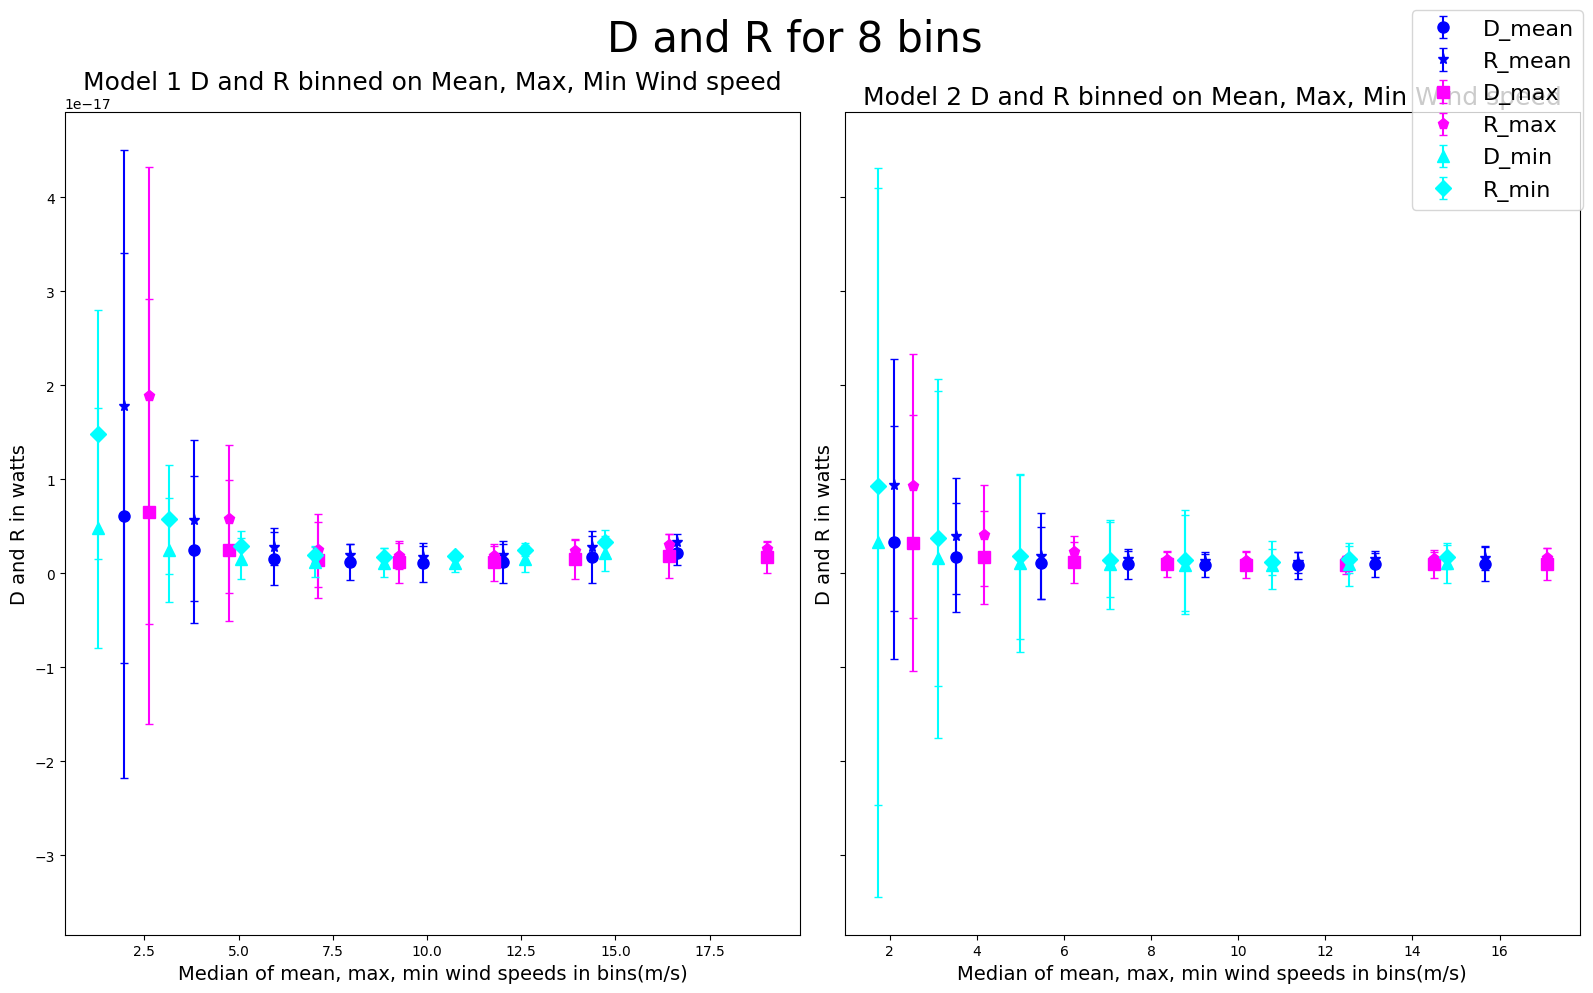

In [ ]:
plot_DR(D[:6],R[:6],bootstrap_std_1[0],bootstrap_std_1[1],x_axis_1,titles_DR[:6],xlabel_1, ylabel_1, 'D and R for 8 bins', 8)

From the plots above, we can see that, for both models, observations with wind speed less than 2.5 m/s have high $D$ and $R$ values across all the wind speed statistics. In addition to that, these values have high standard error bars indicating that there is high uncertainity in these values.

Observations associated with wind speed statistics greater than 5 m/s have relatively low $D$ and $R$ values as well as low standard error bars which indicates less variability.

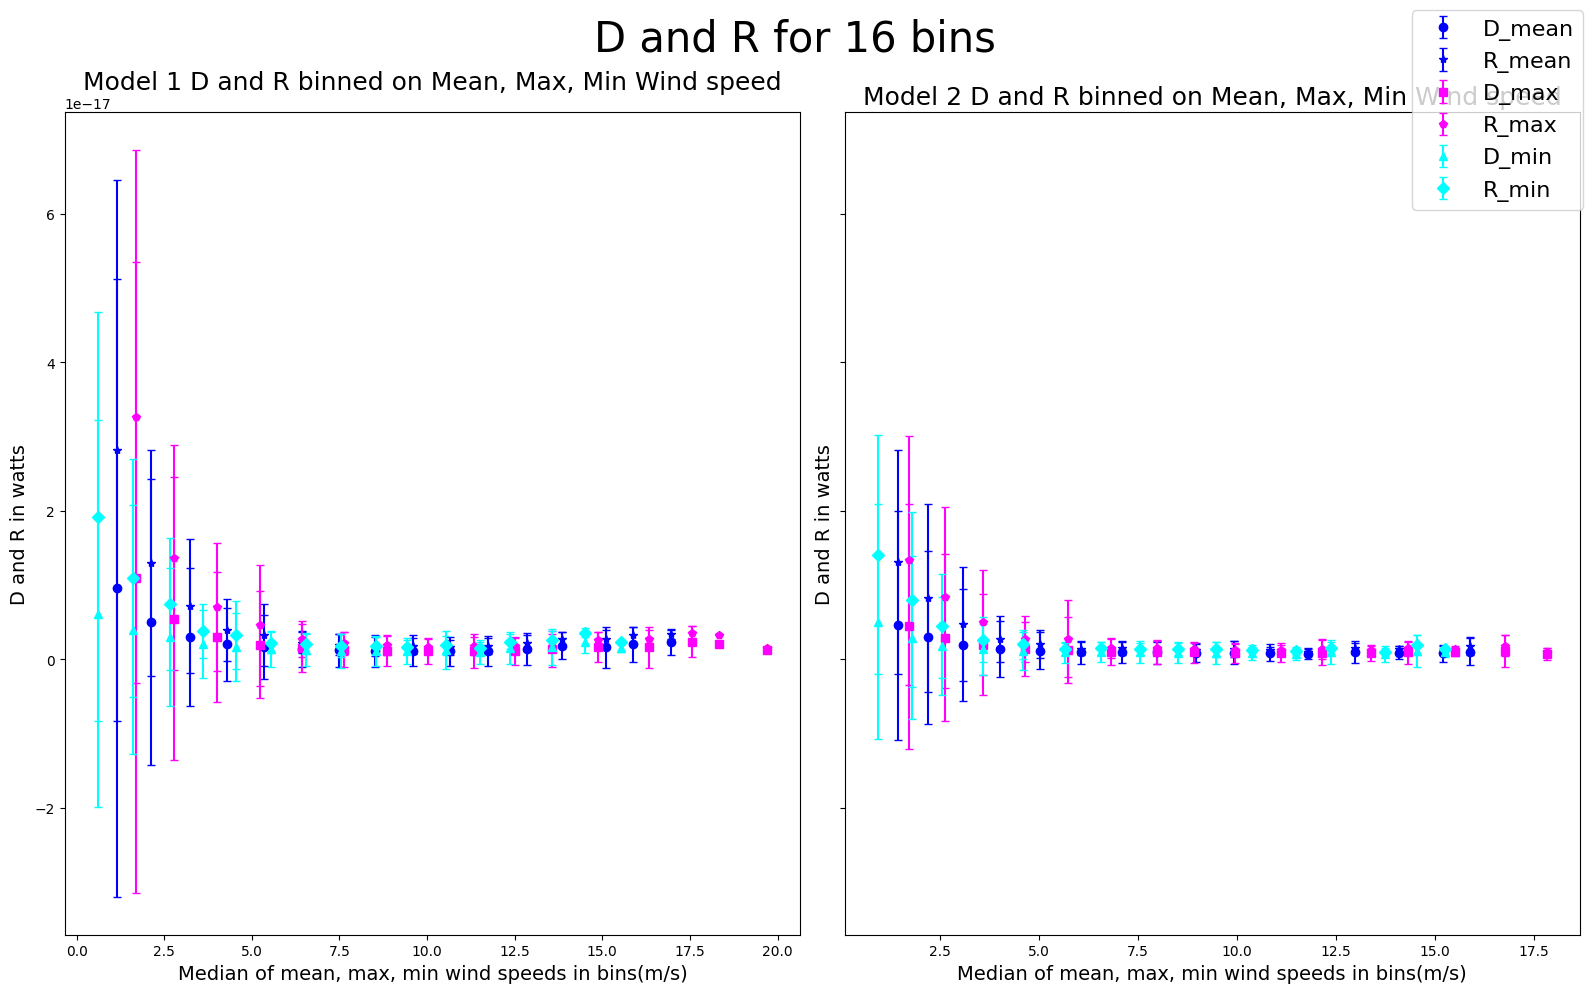

In [ ]:
plot_DR(D[6:],R[6:],bootstrap_std_2[0],bootstrap_std_2[1],x_axis_2,titles_DR[:6],xlabel_1,ylabel_1, 'D and R for 16 bins', 6)

These plots are essentially the same as the ones plotted for 8 bins: the main difference being more $D$/$R$ values and different height error bars. Our anticipation was that they may give us more details on the problematic ranges of wind speeds (those with high $D$ and $R$). However, the analysis made for the 8 bins still holds, except that for model 2, there appears to be less variability in the values when compared to its previous plot, especially the ones associated with low wind speeds.

Model Comparison from the $D$ and $R$ plots

As mentioned, model 2 plot has less variability and slightly lower $D$ and $R$ values which may suggest that it is the better model.

Recommendation for visualization for professor, sponsor or future readers:

If one wishes to connect the dots in these plots, they are welcome to uncomment the code for that and run the function named "plot_DR". We opted to not connect them to better see the closely located dots.

####Visualization of NR

Scatterplot of $NR$ vs wind speed statistics

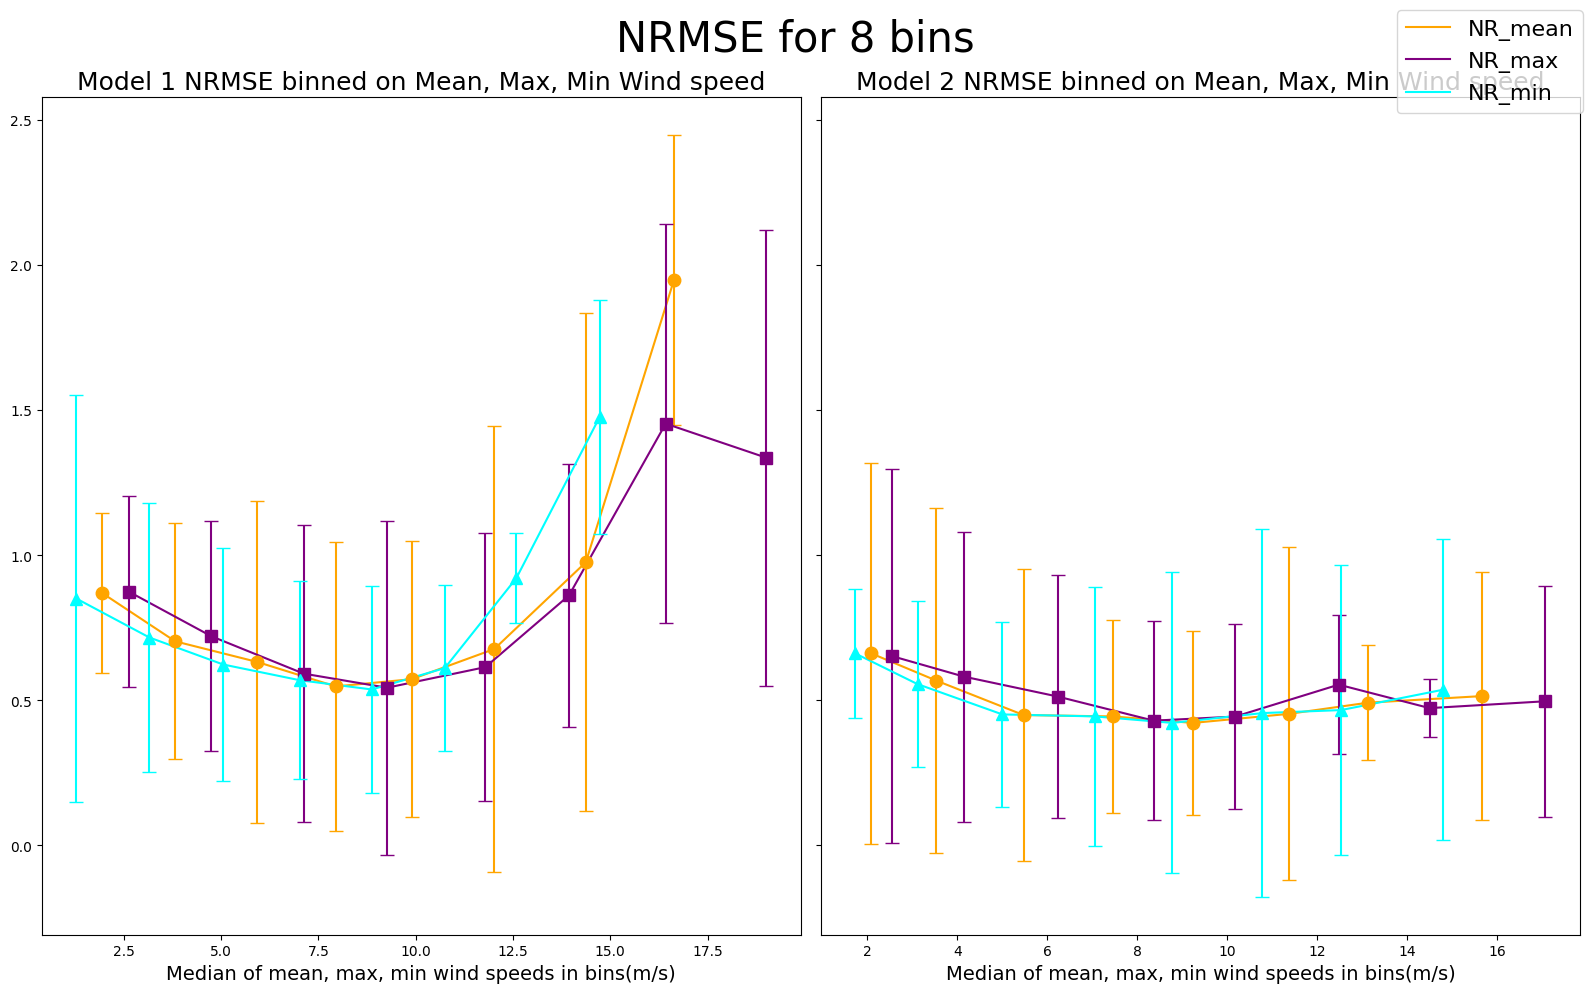

In [ ]:
#Scatterplot of NR vs mean wind speed for 2 models using 8 bins
plot_NR(NR_list[:6],bootstrap_std_1[2],x_axis_1,titles_NR[:6],xlabel_1, 'NRMSE for 8 bins')

The scatter plot for model 1 (left) indicates that observations that have wind speed statistics greater than approximately 10 m/s have higher NRMSE or $NR$ values along with larger error bars. On the other hand, for model 2, it can be seen that wind speeds less than 9 m/s yield higher $NR$ values and larger error bars. In addition, model 2 plot shows that high wind speeds are not necessarily problematic as opposed to model one.

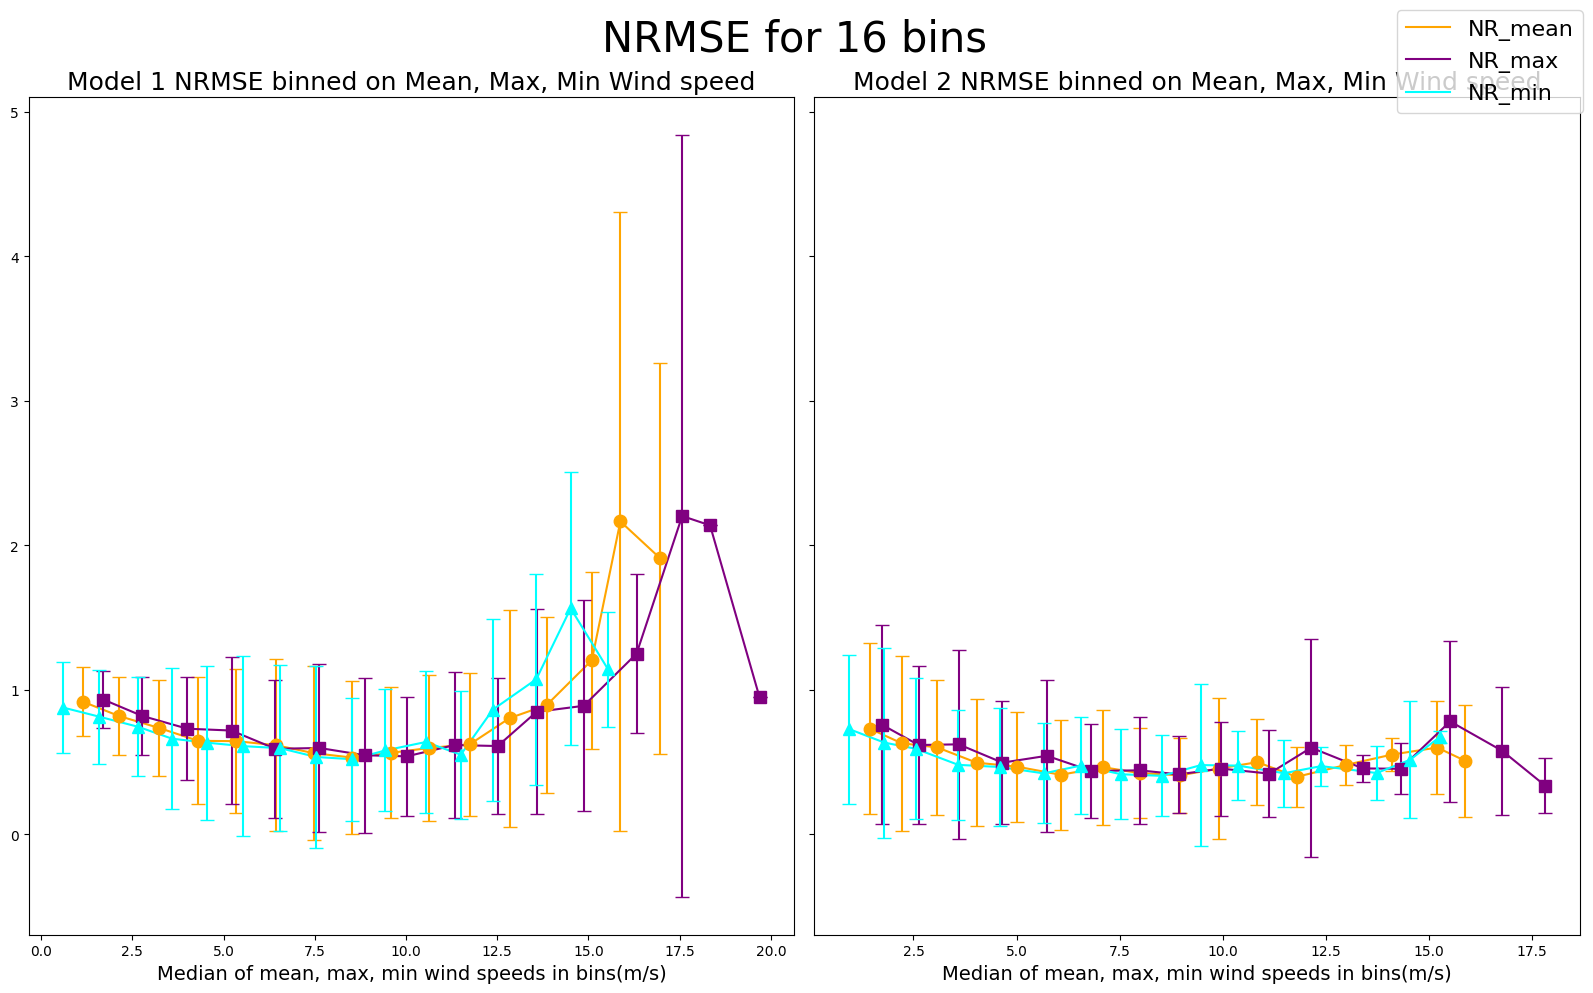

In [ ]:
#Scatterplot of NR vs mean wind speed for 2 models using 16 bins
plot_NR(NR_list[6:],bootstrap_std_2[2],x_axis_2,titles_NR[:6],xlabel_1, 'NRMSE for 16 bins')

The error bars in these 16-bin $NR$ plots appear to be smaller than the previous 8-bin $NR$ plots except for few $D$ and $R$ values associated with high wind speed for model 1, and low and few intermediate wind speeds for model 2. In model 1, there is an outlier that has low $NR$ value associated with maximum wind speed (purple) of approximately 20 m/s.

Model Comparison from the $NR$ plots

As is the case for most error metric values, $NR$ values closer to 0 indicate better accuracy in the predicted (modeled) observations. Model 2 plot shows that the $NR$ values are closer to 0 while model 1 plot shows that there are even some $NR$ values greater than 1. Also, it can be seen that model 2 has relatively smaller error bars compared to model 1 which implies that there is relatively less variability in our results.

###Visualization of PSNR

In [ ]:
# Print the PSNR for each of the 16 bins in each model
for model_name, PSNR_list in PSNR_dict.items():
    print(f"The PSNR in dB for each of the 16 bins in chronological order for {model_name}:\n{PSNR_list}")

The PSNR in dB for each of the 16 bins in chronological order for model1:
[22.872340987944895, 24.95075087750173, 27.878994835183924, 27.992214712111533, 30.68774631570159, 25.048103338544614, 26.17998136351325, 25.16462874501789, 23.626715289595555, 21.89887800153151, 21.889598815126817, 19.408355329753658, 16.617504139010247, 14.06941921438313, 8.442470691631726, 9.917525097844713]
The PSNR in dB for each of the 16 bins in chronological order for model2:
[29.79540336403831, 32.00374202363329, 27.681204036332282, 28.275903372045, 28.227506466304888, 28.905739317741546, 25.769160522683904, 27.45084505820769, 25.95371003972175, 25.118415106460912, 23.946151580201146, 23.880380035018085, 23.20470984166985, 19.097310037424215, 17.796566346795483, 20.903680947314747]


Scatter plot of PSNR values for both models across 16 bins

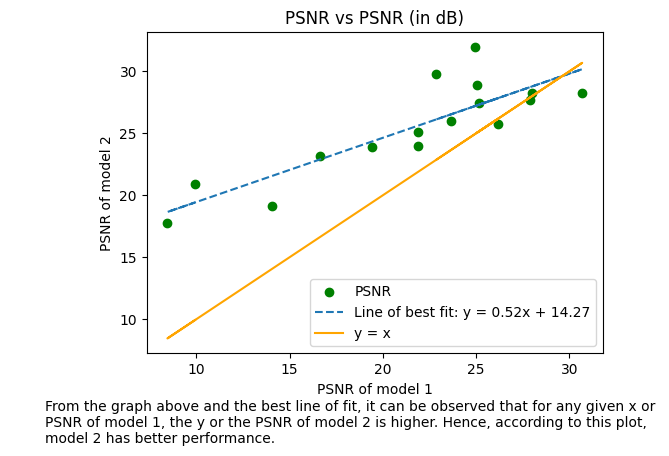

In [ ]:
#Scatterplot of PSNR VS PSNR
# use PSNR_dict dictionary for PSNR values
plt.scatter(PSNR_dict["model1"], PSNR_dict["model2"], c='green', label='PSNR')

# calculate the line of best fit
fit = np.polyfit(PSNR_dict["model1"], PSNR_dict["model2"], 1)
fit_fn = np.poly1d(fit)

# add the fit line to the plot
plt.plot(PSNR_dict["model1"], fit_fn(PSNR_dict["model1"]), '--', label=f'Line of best fit: y = {fit[0]:.2f}x + {fit[1]:.2f}')

# add the y = x line to compare the fitting line
plt.plot(PSNR_dict["model1"], PSNR_dict["model1"], label='y = x', color='orange')
'''the line PSNR_list fittig line always has a lower slope than y=x
   meaning that model 1 PSNR (PSNR_list) is lower than model 2 '''
#'''the line PSNR_list = PSNR_list line always has a higher slope than the best
#line of fit meaning that model 1 PSNR (PSNR_list) is lower than model 2 '''

txt_PSNR = '''
        From the graph above and the best line of fit, it can be observed that for any given x or
        PSNR of model 1, the y or the PSNR of model 2 is higher. Hence, according to this plot,
        model 2 has better performance.'''

plt.title("PSNR vs PSNR (in dB)")
plt.xlabel("PSNR of model 1")
plt.ylabel("PSNR of model 2")
plt.text(0, 0, txt_PSNR)
plt.tight_layout()
plt.legend()
plt.show()

Generally, with PSNR metric, the higher its value, the better the quality of the compressed image [source](https://www.mathworks.com/help/vision/ref/psnr.html#:~:text=The%20higher%20the%20PSNR%2C%20the,to%20compare%20image%20compression%20quality.); in our case, the better the accuracy of the modeled observations. From the PSNR values for both models computed above, we see that as we go from bin1 to bin(n), the PSNR values generally decrease. One should note that in the formation of our bins, as we go to higher order bin numbers, we have higher magnitude of wind speeds. Therefore, PSNR decreasing for higher order of bins implies that the modeled observation decreases in quality or strays further away from the corresponding real DDM observation for high wind speeds. This is best visualized by the following plot.

For the next scatterplot, bootstrapping with replacement was also performed as done for the other error metrics plots.

In [ ]:
# Bootsrapping for PSNR plots

R_bootstrap_std = []
PSNR_bootstrap_std = []

for i in (6,9):
        R_individual_std_list = []
        PSNR_individual_std_list = []

        for m in range(1,17):
            Y_obs = bin_data[i][f"bin{m}"]["Y_obs"].values
            Y_model = bin_data[i][f"bin{m}"]["Y_model"].values
            n = len(Y_obs)

            R_individual = []
            PSNR_individual = []

            for _ in range(n_bootstrap_samples):
                index_sample = np.random.choice(n, size=10, replace=True)
                sample_obs_psnr = Y_obs[index_sample]
                sample_model_psnr = Y_model[index_sample]

                difference = sample_obs_psnr - sample_model_psnr

                frobenius_norm = np.sqrt(np.sum(difference**2))

                R_ind = frobenius_norm / np.sqrt(dm3)

                P = np.max(sample_obs)
                PSNR_ind = multiplier * math.log10((P**2) / (R_ind**2))
                PSNR_individual.append(PSNR_ind)

            PSNR_individual_std_list.append(np.std(PSNR_individual))

        PSNR_bootstrap_std.append(PSNR_individual_std_list)

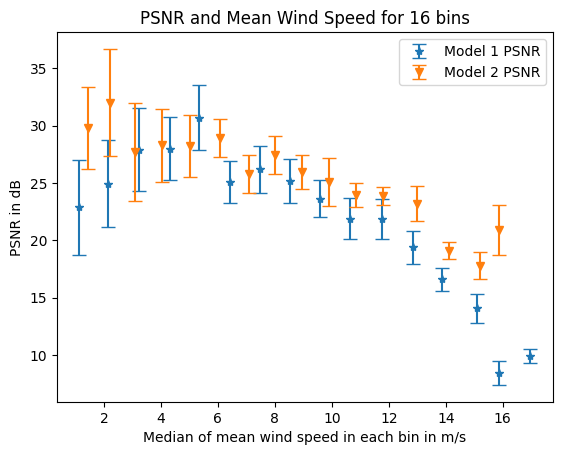

In [ ]:
#Scatterplot of PSNR vs Mean wind speed using 16 bins

plt.errorbar(x_axis_2[0], PSNR_dict["model1"], yerr=PSNR_bootstrap_std[0], fmt='*', capsize=5)
plt.errorbar(x_axis_2[3], PSNR_dict["model2"], yerr=PSNR_bootstrap_std[1], fmt='v', capsize=5)

plt.title('PSNR and Mean Wind Speed for 16 bins')
plt.xlabel('Median of mean wind speed in each bin in m/s')
plt.ylabel('PSNR in dB')

plt.legend(['Model 1 PSNR', 'Model 2 PSNR'])

plt.show()

The plot above shows that the PSNR values for both models decrease as the median of mean wind speed increases. Also, the PSNR values for model 2 are roughly higher than those for model 1 for the same approximate median of mean wind speed which implies that model 2 performs better. The plot also indicates that the variability of our results for both models seems to be roughly the same.

Additionally, as with the PSNR vs PSNR plot prior to this, the PSNR values decrease when the wind speed approaches the maximum, suggesting that both models have less accurate predictions at high wind speeds.

However, there is some evidence that PSNR is not the best measure for image quality [(source)](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio#Performance_comparison). On the other hand, there is also evidence that PSNR is a good measure for images that have a lot of noise [(source)](https://medium.com/@datamonsters/a-quick-overview-of-methods-to-measure-the-similarity-between-images-f907166694ee).

"However, PSNR may be more appropriate [than SNR] if the modeled data is being compared to a reference image or a ground truth observation. This is because PSNR takes into account both the amount of noise present in the modeled image as well as the difference between the modeled and reference images, whereas SNR only measures the ratio of signal to noise. Therefore, PSNR can provide a more comprehensive measure of the quality of the modeled image when compared to a reference or ground truth image." (ChatGPT generated on 05/12/2023).

This is the case for our project, since we are comparing a modeled DDM observation with a real or "truth" one. Hence, we decided to keep our analysis. What we could have perhaps done was look into other image quality measures to strengthen our PSNR analysis.

# Conclusion

According to our error analysis, Spire's machine learning operator does a substantial job at estimating the observations associated with intermediate wind speeds. However, for observations that have minimum and maximum wind speed statistics, it fails to perform as well. Taking the error metrics we perfomed into consideration, it appears that model 2 has relatively less error metric values with less variability compared to model 1. The PSNR analysis also indicates that model 2 has higher PSNR values. Thus, we believe that the addition of the swell/height feature has slightly improved the machine learning operator performance. However, even with the performance improvement seen in model 2, it still has some limitation at extreme wind speeds. Therefore, some changes to the neural network architecture model could perhaps be beneficial in constructing a machine learning model that accurately estimates CYGNSS DDM observations associated with extreme wind speeds.